In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
train = pd.read_csv("/kaggle/input/hms-harmful-brain-activity-classification/train.csv")

train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


**train.csv** Metadata for the train set. The expert annotators reviewed 50 second long EEG samples plus matched spectrograms covering 10 a minute window centered at the same time and labeled the central 10 seconds. Many of these samples overlapped and have been consolidated. train.csv provides the metadata that allows you to extract the original subsets that the raters annotated.

**eeg_id** - A unique identifier for the entire EEG recording.

**eeg_sub_id** - An ID for the specific 50 second long subsample this row's labels apply to.

**eeg_label_offset_seconds** - The time between the beginning of the consolidated EEG and this subsample.

**spectrogram_id** - A unique identifier for the entire EEG recording.

**spectrogram_sub_id** - An ID for the specific 10 minute subsample this row's labels apply to.

**spectogram_label_offset_seconds** - The time between the beginning of the consolidated spectrogram and this subsample.

**label_id** - An ID for this set of labels.

**patient_id** - An ID for the patient who donated the data.

**expert_consensus** - The consensus annotator label. Provided for convenience only.

**[seizure/lpd/gpd/lrda/grda/other]_vote** - The count of annotator votes for a given brain activity class. The full names of the activity classes are as follows: lpd: lateralized periodic discharges, gpd: generalized periodic discharges, lrd: lateralized rhythmic delta activity, and grda: generalized rhythmic delta activity . A detailed explanations of these patterns is available here.


## Brain activity notebook series

### [EEGS 10–20 system](https://www.kaggle.com/code/seshurajup/eegs-10-20-system)
Better understanding eegs 10-20 system
### [Missing Eeg_ids Train.csv vs train_eegs [Resolved]](https://www.kaggle.com/code/seshurajup/missing-eeg-ids-in-train-csv-vs-train-eegs-parquet)
Extra training eggs [Resolved] as we can ignore it
### [EDA train.csv](https://www.kaggle.com/code/seshurajup/eda-train-csv)
Detailed analysis of the train.csv
### [Eegs Pairing Analysis & Features](https://www.kaggle.com/code/seshurajup/eegs-pairing-analysis-features)
Pairing features analysis and build features
### [Eegs Target Analysis - Correct way to merge target](https://www.kaggle.com/code/seshurajup/eegs-target-analysis-correct-way-to-merge-target)
How to choice the target votes for training
### [Eegs Train Split (CV)](https://www.kaggle.com/seshurajup/eegs-train-splits-cv)
generate better train split without patient_id overlap
### [Spectrogram Distribution Analysis (Sample)](https://www.kaggle.com/code/seshurajup/spectrogram-distribution-analysis-sample?scriptVersionId=160198896)
Explore the reason - magic of **np.clip(img,np.exp(-4),np.exp(8))** which improved all public LB scores by 0.1 - introduced by Chris
#### **Upvote my work if it is useful**

In [2]:
rows, columns = train.shape
rows, columns

(106800, 15)

In [3]:
train_info = train.info()
train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [4]:
train.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [5]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
categorical_summary = train[categorical_columns].describe()
categorical_summary

,expert_consensus
count,106800
unique,6
top,Seizure
freq,20933


In [6]:
list(set(train['expert_consensus'].unique()))

['Seizure', 'LRDA', 'LPD', 'GPD', 'GRDA', 'Other']

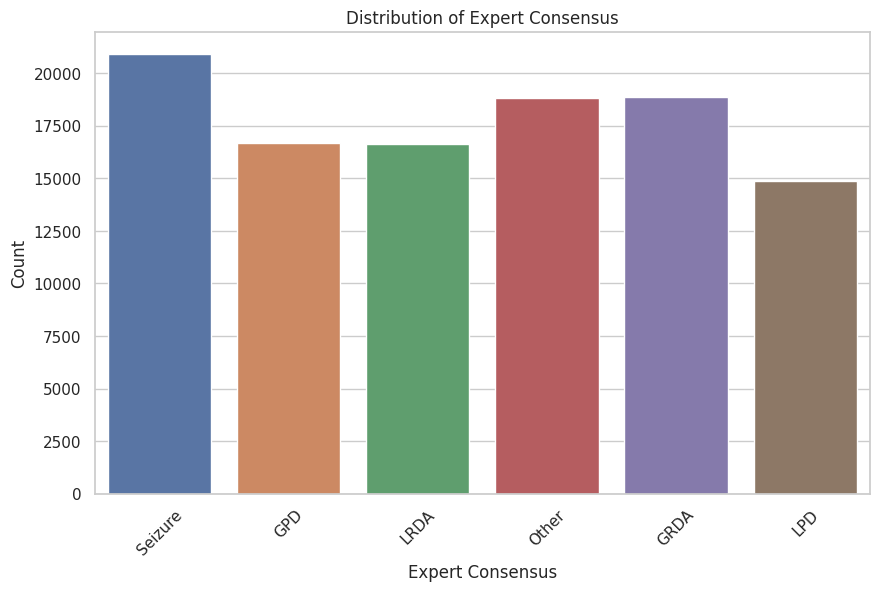

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='expert_consensus')
plt.title('Distribution of Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

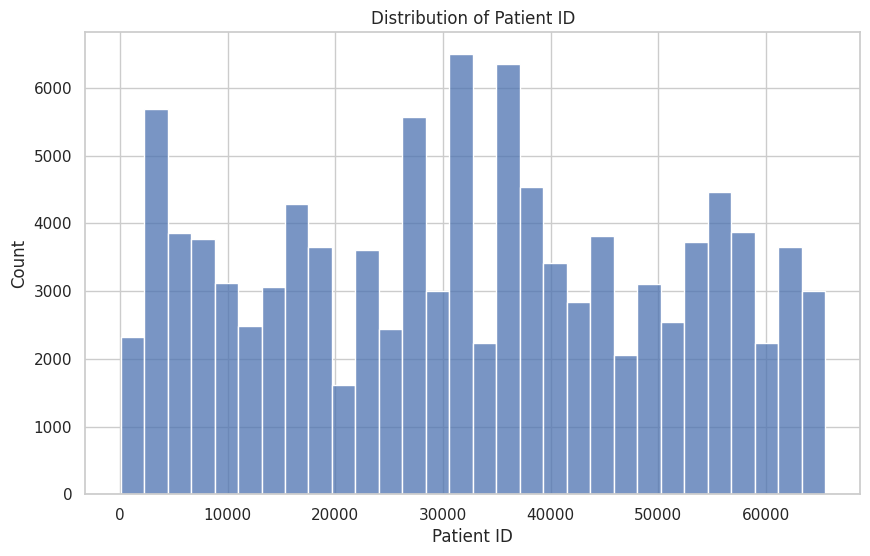

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train['patient_id'], bins=30, kde=False)
plt.title('Distribution of Patient ID')
plt.xlabel('Patient ID')
plt.ylabel('Count')
plt.show()

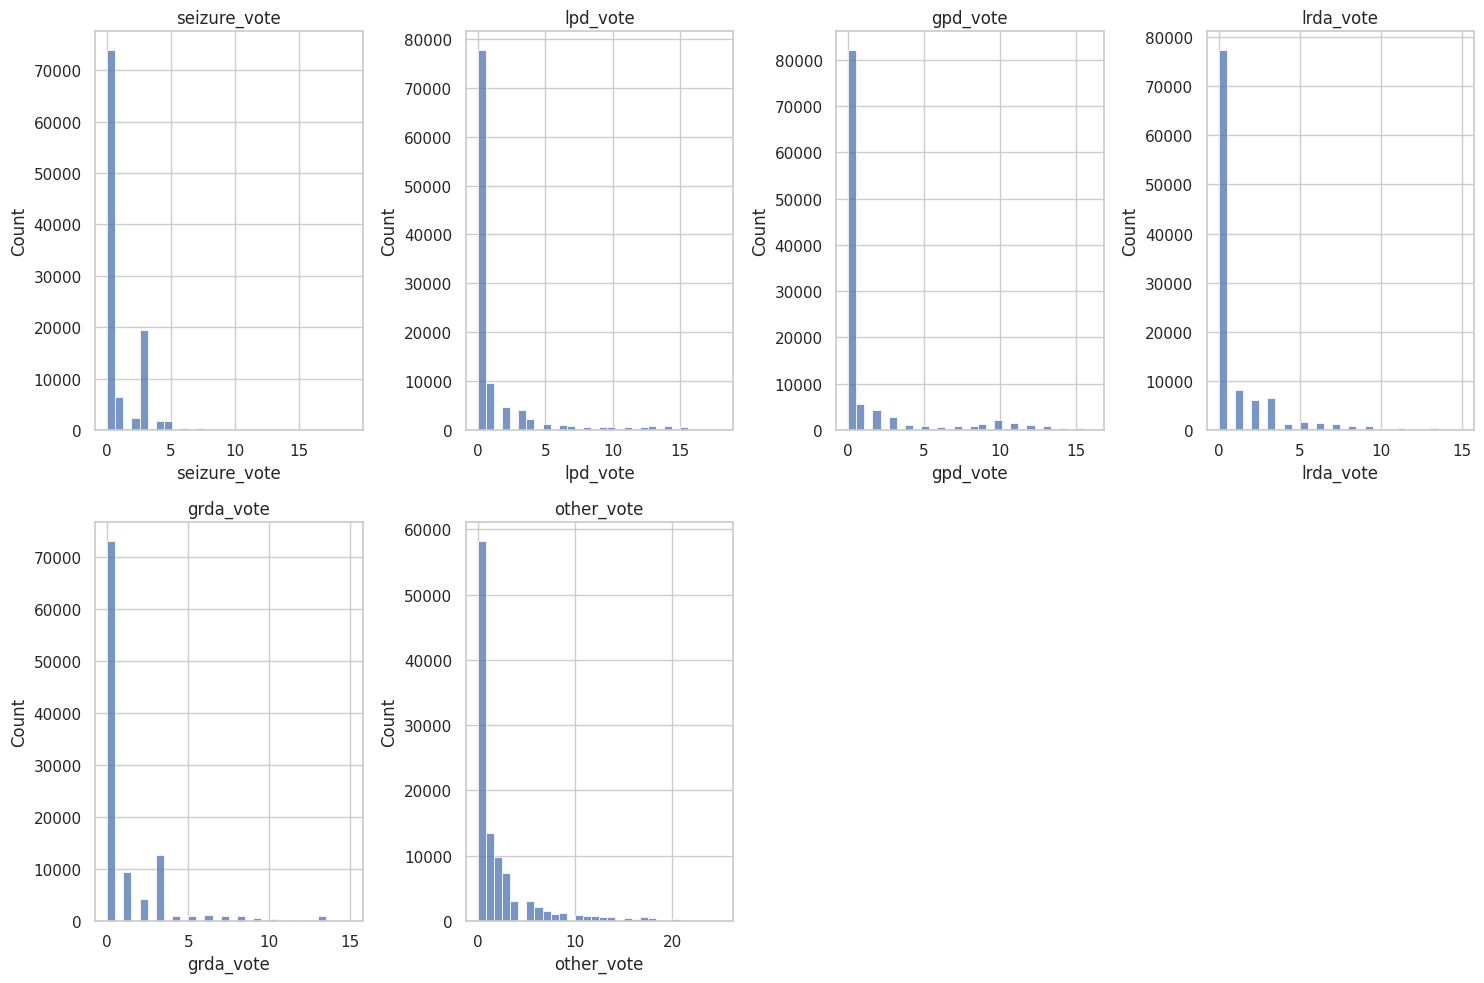

In [9]:
targets = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

plt.figure(figsize=(15, 10))
for i, column in enumerate(targets, 1):
    plt.subplot(2, 4, i)
    sns.histplot(train[column], kde=False, bins=30)
    plt.title(column)
plt.tight_layout()

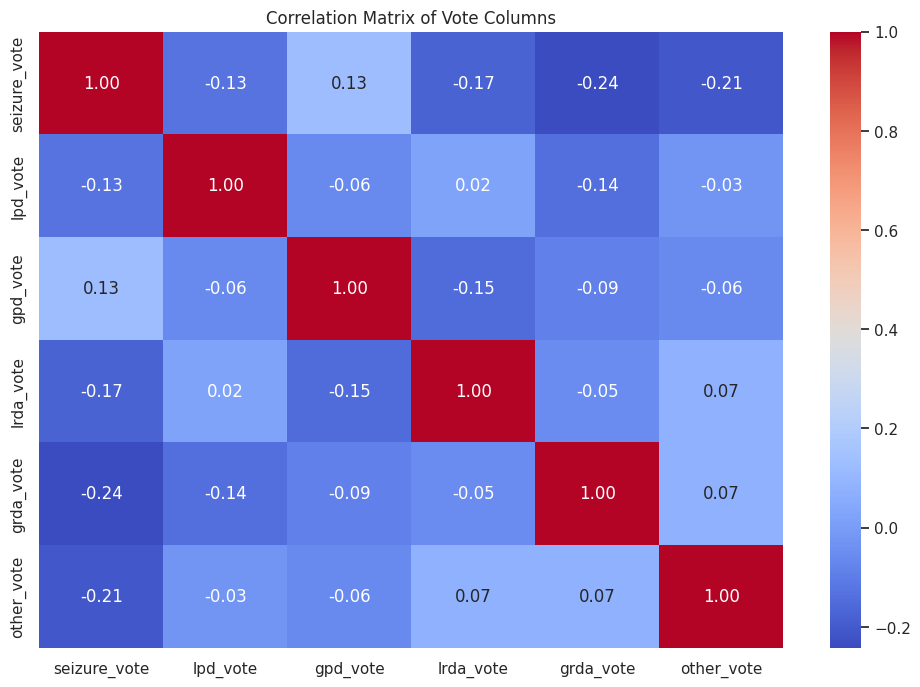

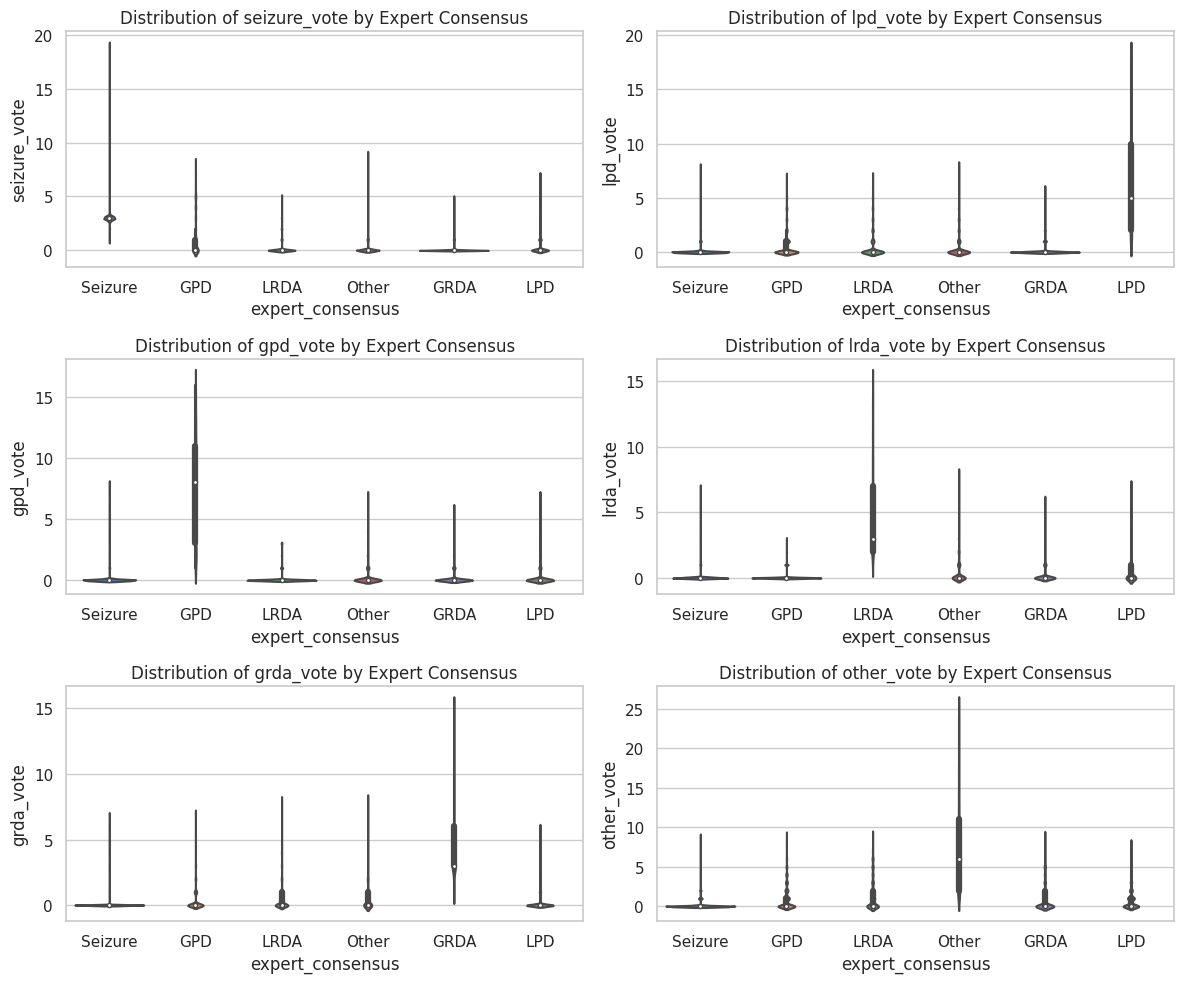

In [10]:
correlation_targets = train[targets].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_targets, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Vote Columns')
plt.show()

plt.figure(figsize=(12, 10))
for i, column in enumerate(targets, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=train, x='expert_consensus', y=column)
    plt.title(f'Distribution of {column} by Expert Consensus')

plt.tight_layout()
plt.show()

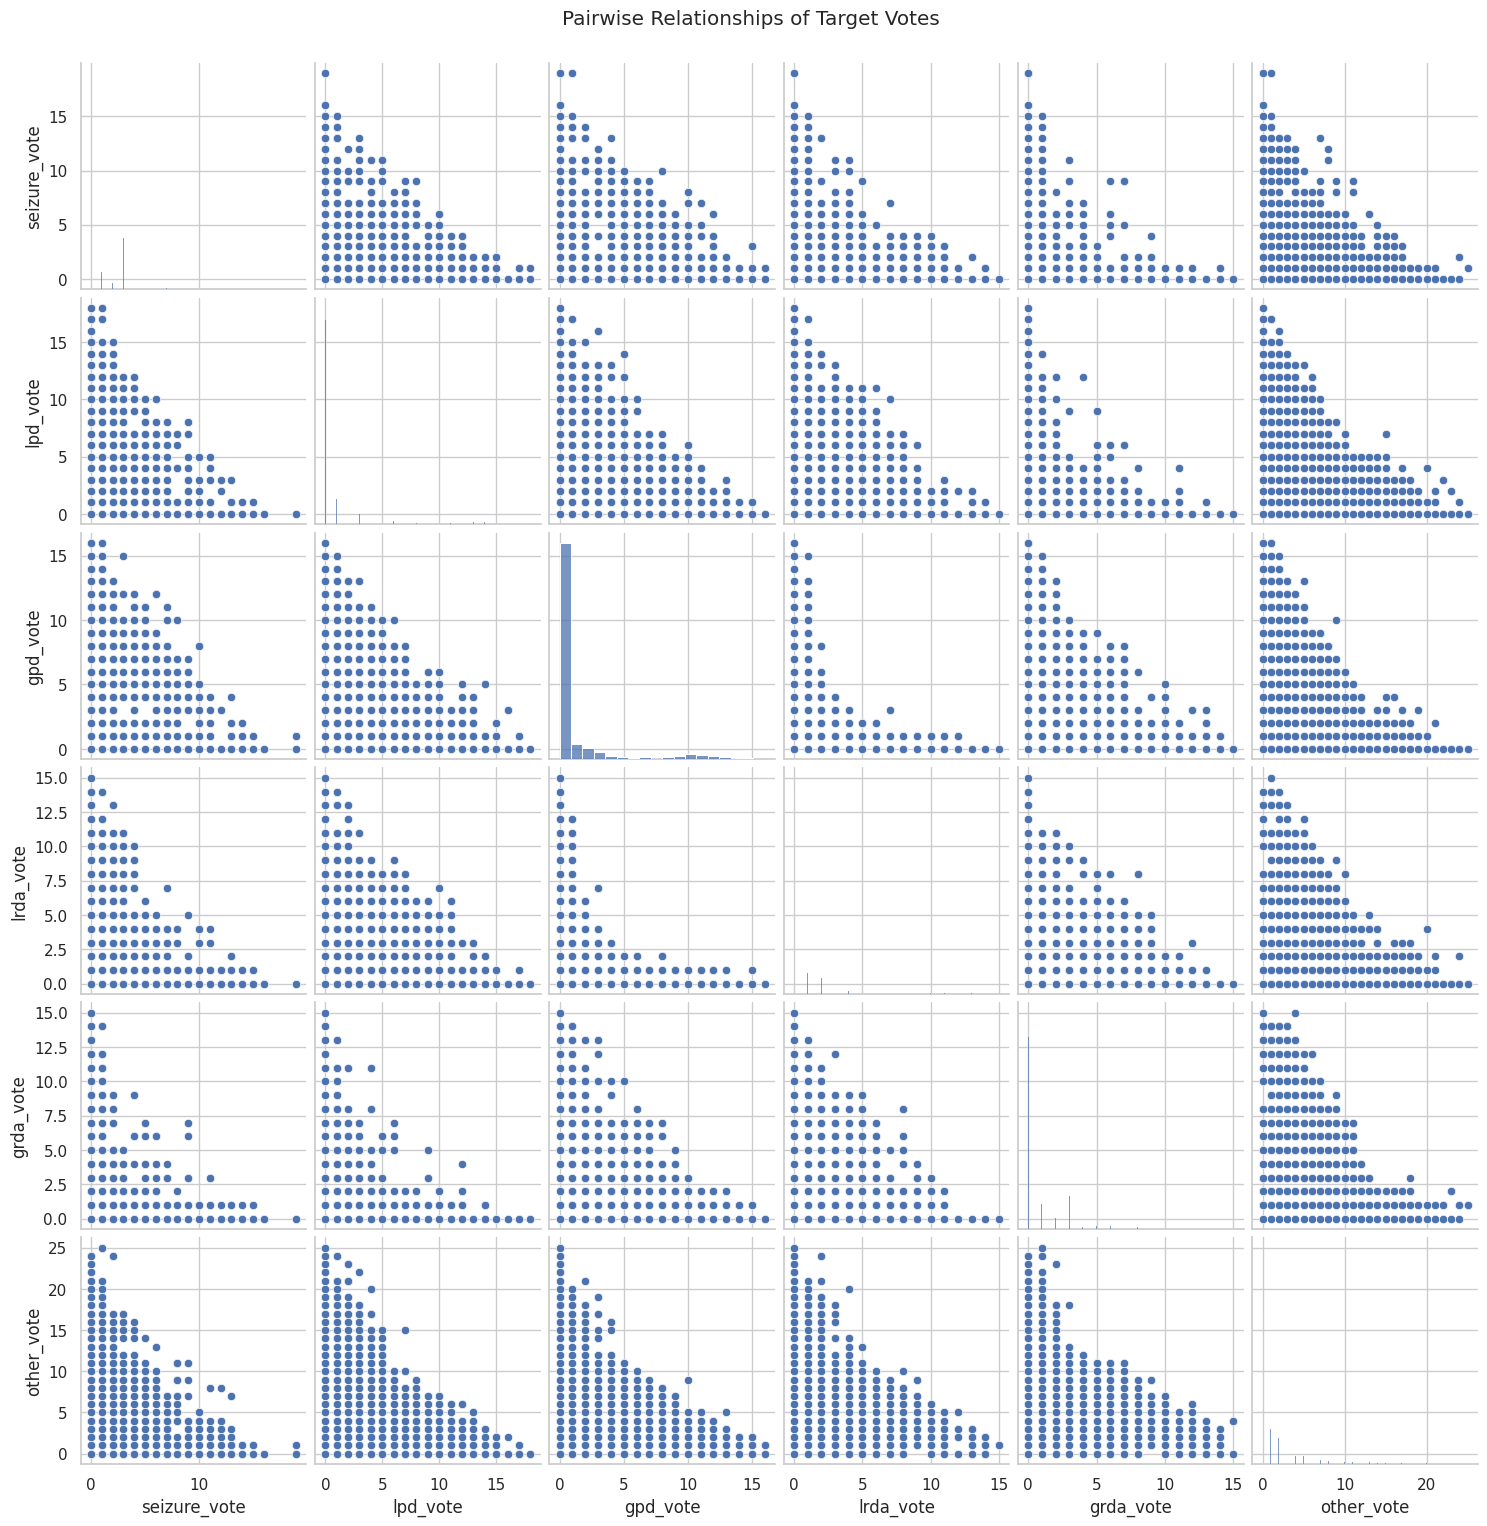

In [11]:
sns.pairplot(train[targets])
plt.suptitle('Pairwise Relationships of Target Votes', y=1.02)
plt.show()

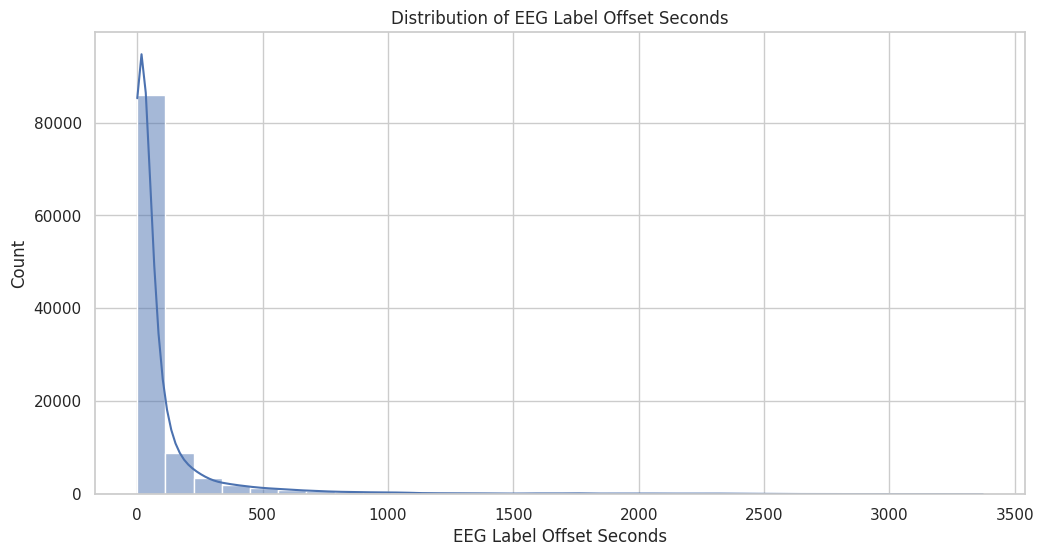

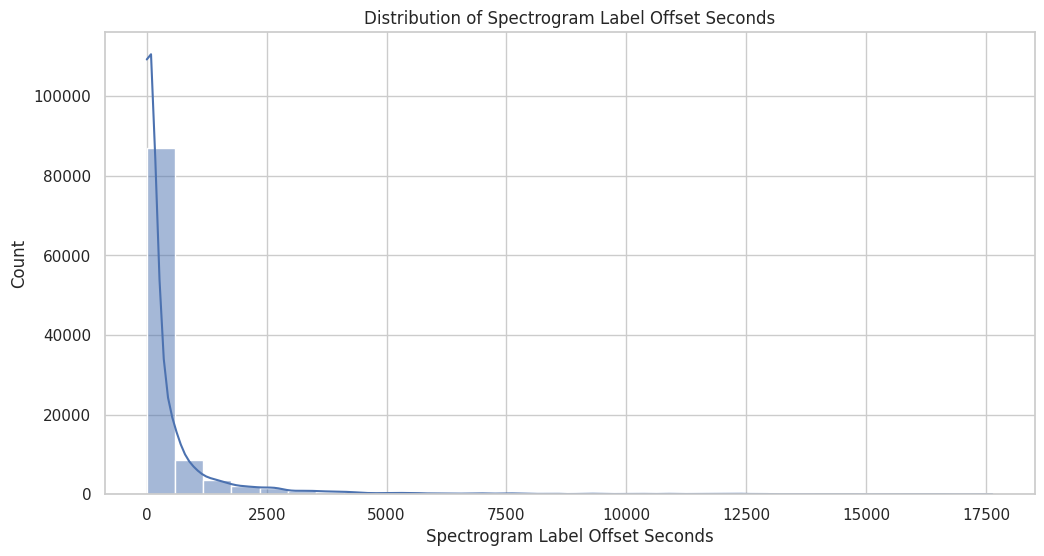

,eeg_label_offset_seconds,spectrogram_label_offset_seconds
count,106800.000000,106800.000000
mean,118.817228,520.431404
std,314.557803,1449.759868
min,0.000000,0.000000
25%,6.000000,12.000000
50%,26.000000,62.000000
75%,82.000000,394.000000
max,3372.000000,17632.000000


In [12]:
offset_stats = train[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds']].describe()

plt.figure(figsize=(12, 6))
sns.histplot(train['eeg_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of EEG Label Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train['spectrogram_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of Spectrogram Label Offset Seconds')
plt.xlabel('Spectrogram Label Offset Seconds')
plt.ylabel('Count')
plt.show()

offset_stats

In [13]:
total_eegs = len(train['eeg_id'].unique())
total_eegs

17089

In [14]:
all_eeg_label_offset_seconds = sorted(list(train['eeg_label_offset_seconds'].unique()))
len(all_eeg_label_offset_seconds), str(all_eeg_label_offset_seconds[0:5]), str(all_eeg_label_offset_seconds[-5:])

(1502, '[0.0, 2.0, 4.0, 6.0, 8.0]', '[3352.0, 3362.0, 3364.0, 3366.0, 3372.0]')

In [15]:
all_spectrogram_label_offset_seconds = sorted(list(train['spectrogram_label_offset_seconds'].unique()))
len(all_spectrogram_label_offset_seconds), str(all_spectrogram_label_offset_seconds[0:5]), str(all_spectrogram_label_offset_seconds[-5:])

(4686,
 '[0.0, 2.0, 4.0, 6.0, 8.0]',
 '[17622.0, 17624.0, 17626.0, 17630.0, 17632.0]')

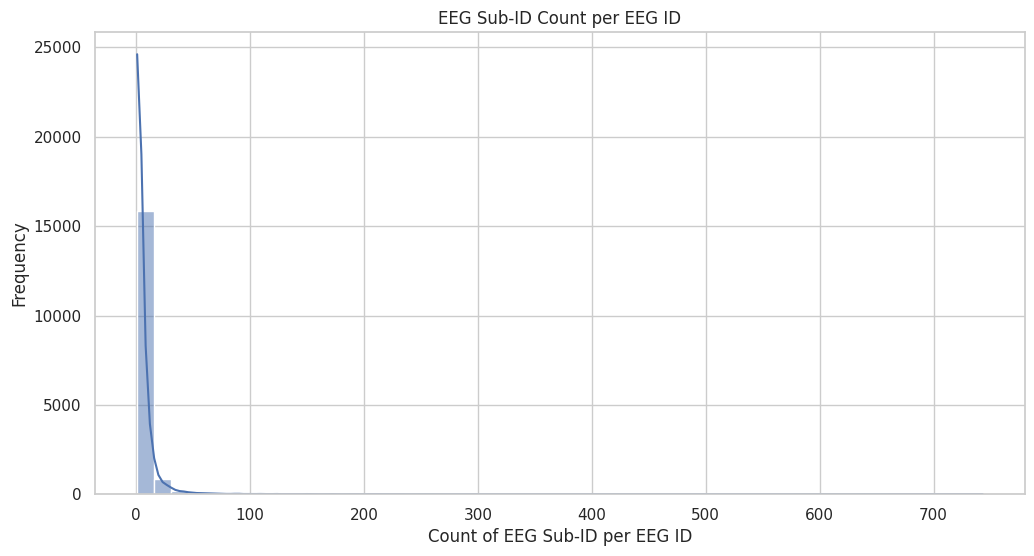

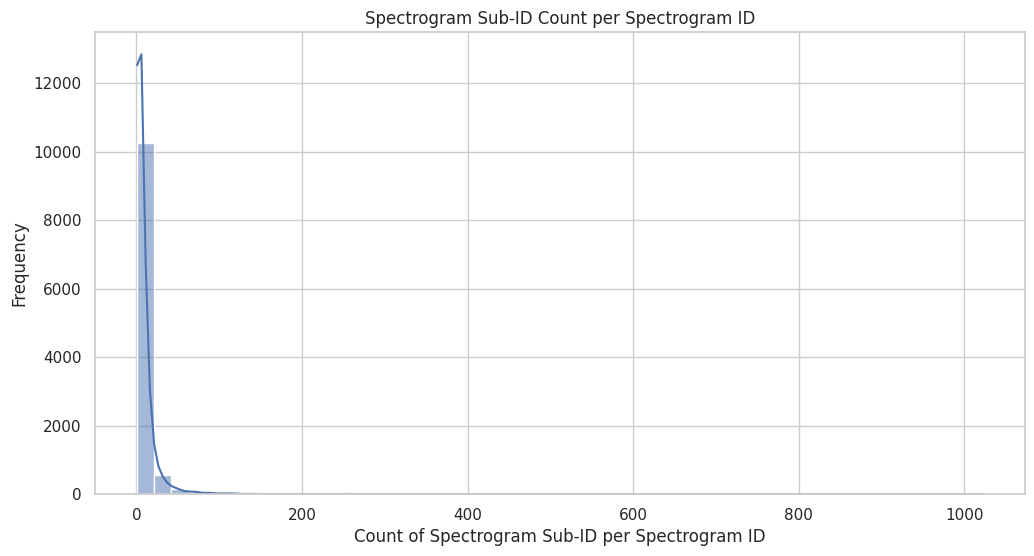

In [16]:
eeg_sub_id_count_per_eeg_id = train.groupby('eeg_id')['eeg_sub_id'].nunique()
spectrogram_sub_id_count_per_spectrogram_id = train.groupby('spectrogram_id')['spectrogram_sub_id'].nunique()

plt.figure(figsize=(12, 6))
sns.histplot(eeg_sub_id_count_per_eeg_id, bins=50, kde=True)
plt.title('EEG Sub-ID Count per EEG ID')
plt.xlabel('Count of EEG Sub-ID per EEG ID')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(spectrogram_sub_id_count_per_spectrogram_id, bins=50, kde=True)
plt.title('Spectrogram Sub-ID Count per Spectrogram ID')
plt.xlabel('Count of Spectrogram Sub-ID per Spectrogram ID')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

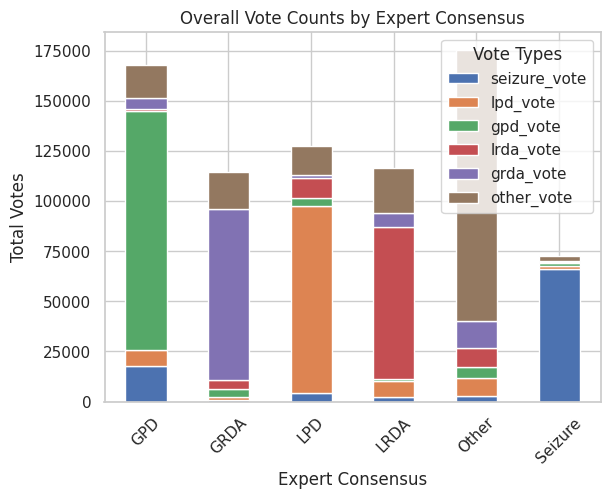

In [17]:
vote_counts_by_consensus = train.groupby('expert_consensus')[targets].sum()

plt.figure(figsize=(12, 8))
vote_counts_by_consensus.plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

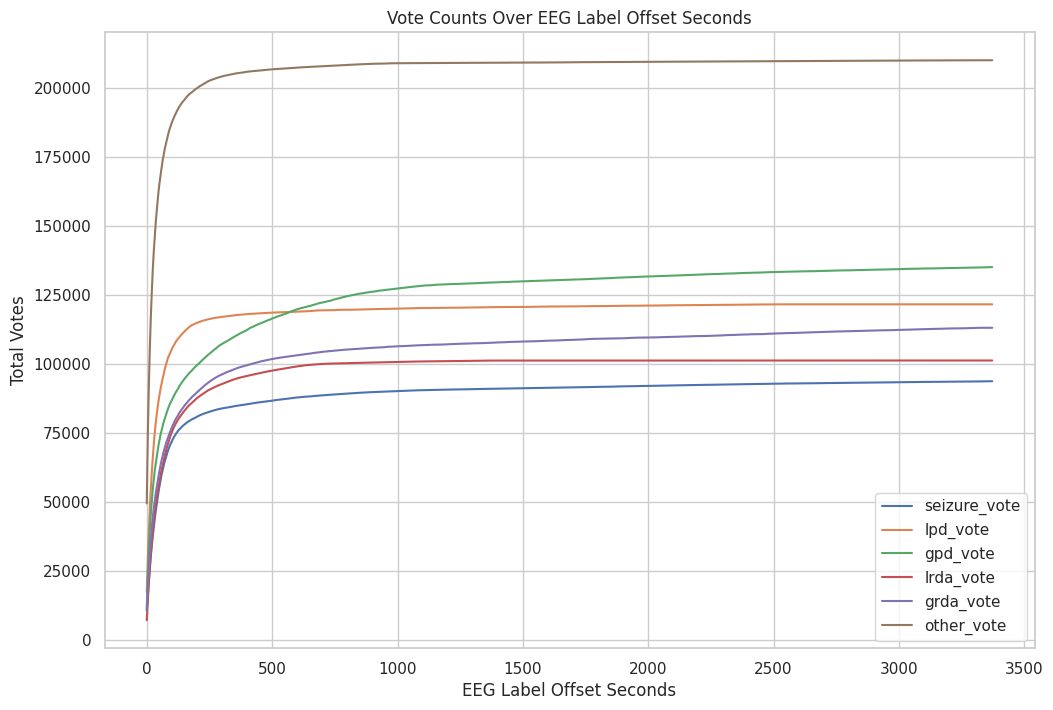

In [18]:
cumulative_votes = train.groupby('eeg_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['eeg_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over EEG Label Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

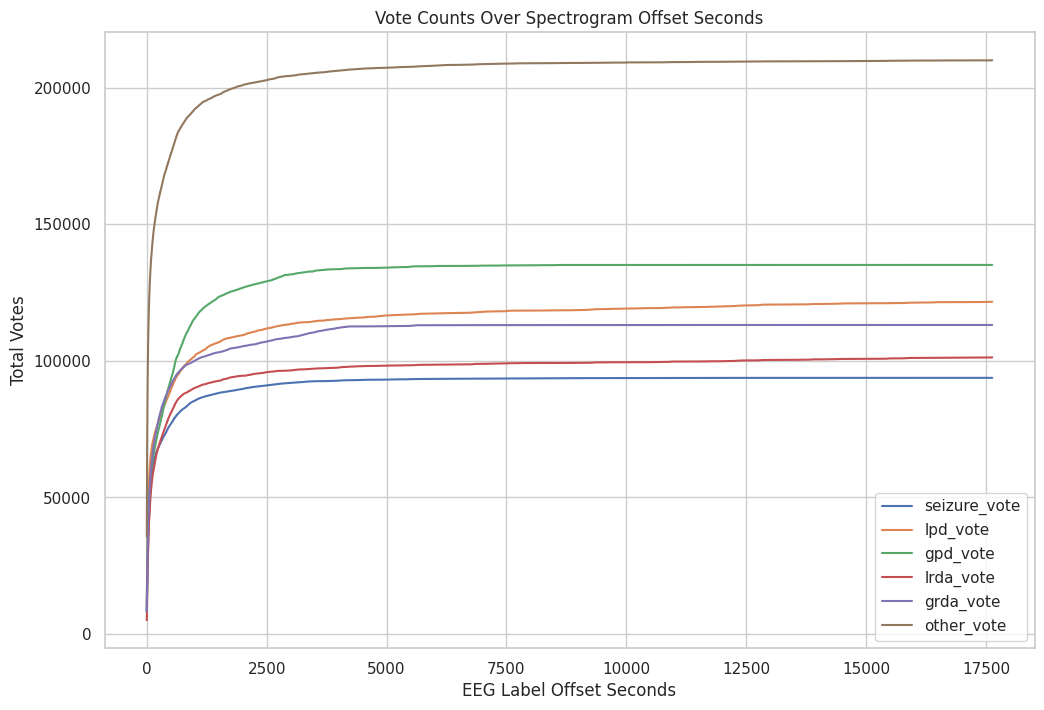

In [19]:
cumulative_votes = train.groupby('spectrogram_label_offset_seconds')[targets].sum().cumsum().reset_index()

plt.figure(figsize=(12, 8))
for column in targets:
    plt.plot(cumulative_votes['spectrogram_label_offset_seconds'], cumulative_votes[column], label=column)

plt.title('Vote Counts Over Spectrogram Offset Seconds')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Total Votes')
plt.legend()
plt.show()

In [20]:
cumulative_votes

,spectrogram_label_offset_seconds,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,0.0,8009,10734,8311,5061,8281,35651
1,2.0,10077,14828,12654,7650,11533,45847
2,4.0,12273,18861,16759,10248,14689,55170
3,6.0,14422,22099,20451,12586,17656,62513
4,8.0,16367,25458,23468,14960,20268,68793
...,...,...,...,...,...,...,...
4681,17622.0,93773,121606,135094,101250,113121,209983
4682,17624.0,93773,121610,135094,101257,113121,209987
4683,17626.0,93773,121614,135094,101264,113121,209991
4684,17630.0,93773,121618,135094,101271,113121,209995


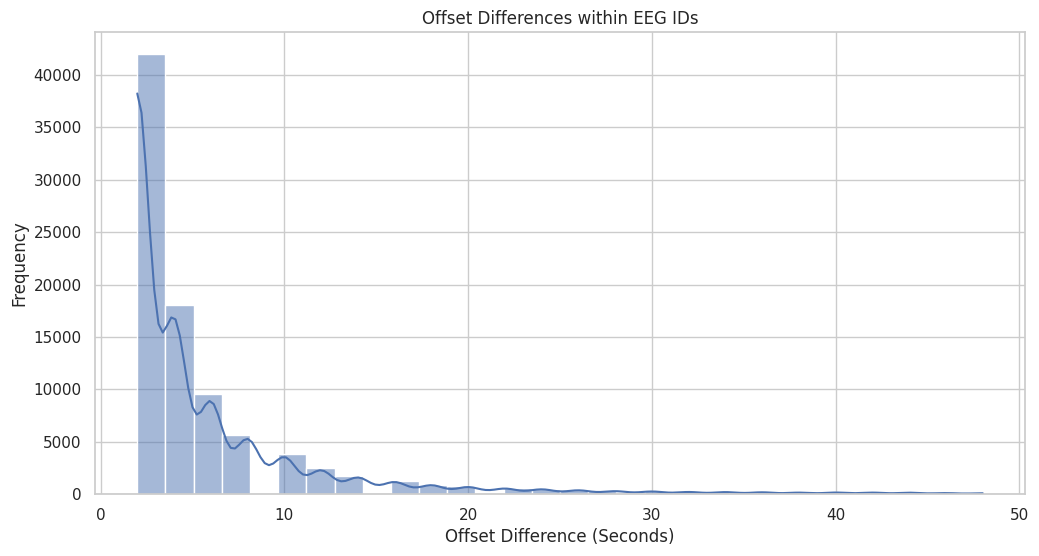

In [21]:
sorted_data = train.sort_values(by=['eeg_id', 'eeg_sub_id'])

sorted_data['offset_difference'] = sorted_data.groupby('eeg_id')['eeg_label_offset_seconds'].diff()

offset_differences = sorted_data['offset_difference'].dropna()

offset_difference_stats = offset_differences.describe()

plt.figure(figsize=(12, 6))
sns.histplot(offset_differences, bins=30, kde=True)
plt.title('Offset Differences within EEG IDs')
plt.xlabel('Offset Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

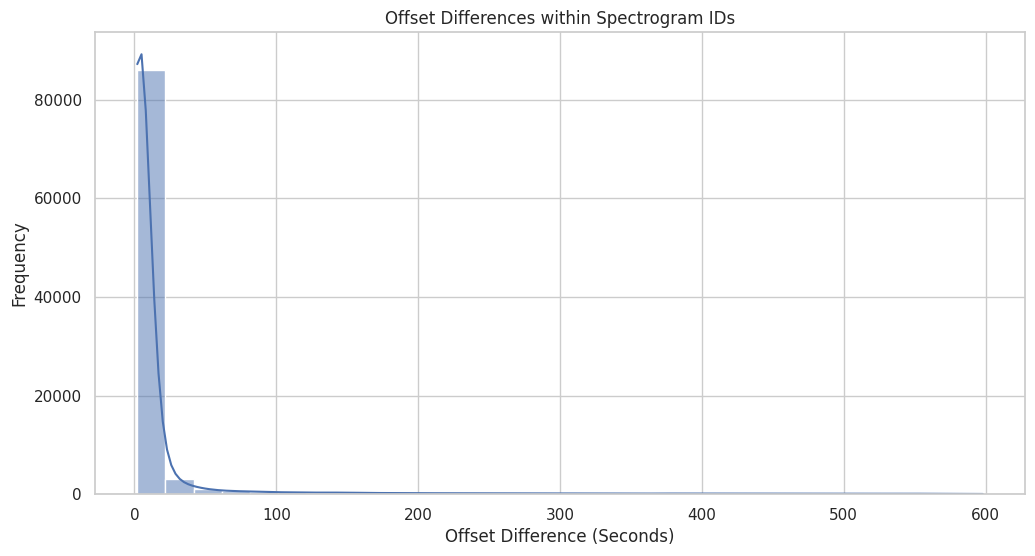

In [22]:
sorted_data = train.sort_values(by=['spectrogram_id', 'spectrogram_sub_id'])

sorted_data['offset_difference'] = sorted_data.groupby('spectrogram_id')['spectrogram_label_offset_seconds'].diff()

offset_differences = sorted_data['offset_difference'].dropna()

offset_difference_stats = offset_differences.describe()

plt.figure(figsize=(12, 6))
sns.histplot(offset_differences, bins=30, kde=True)
plt.title('Offset Differences within Spectrogram IDs')
plt.xlabel('Offset Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

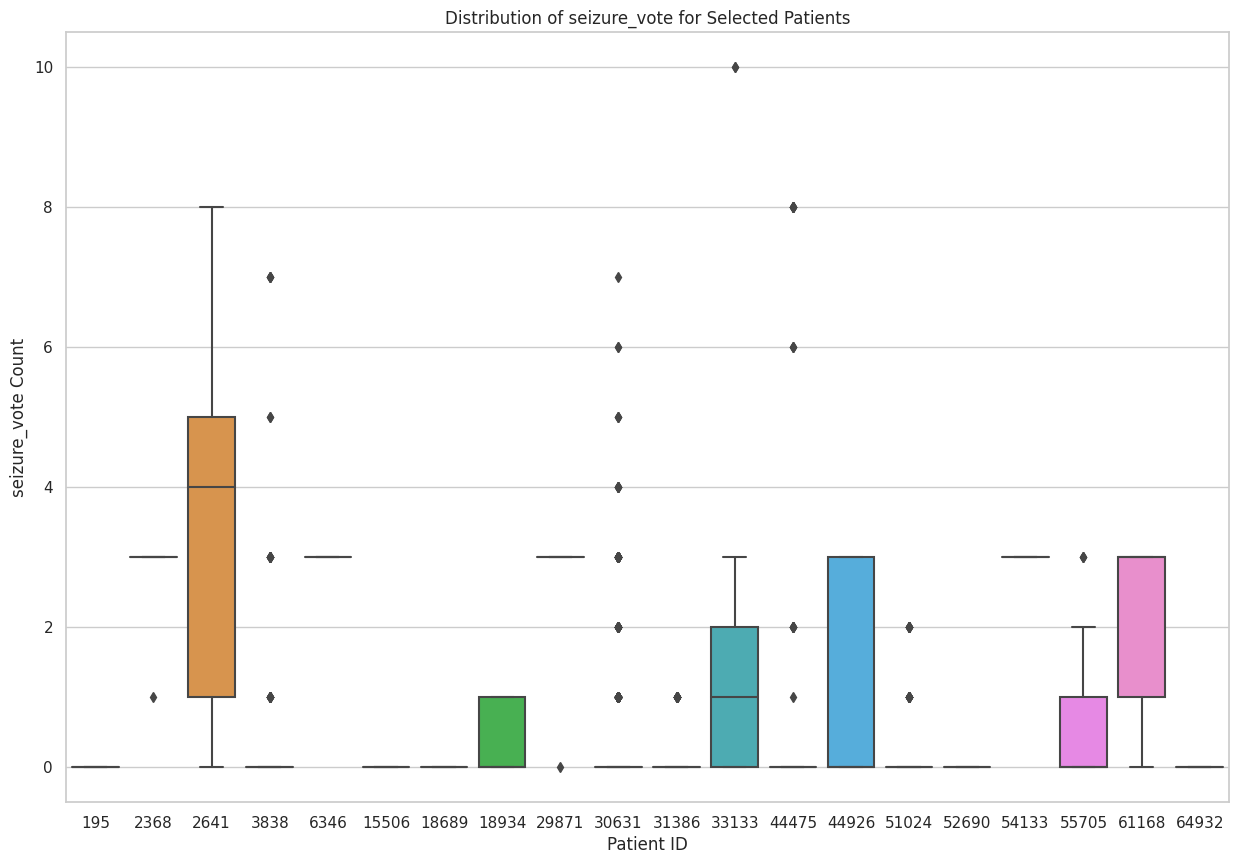

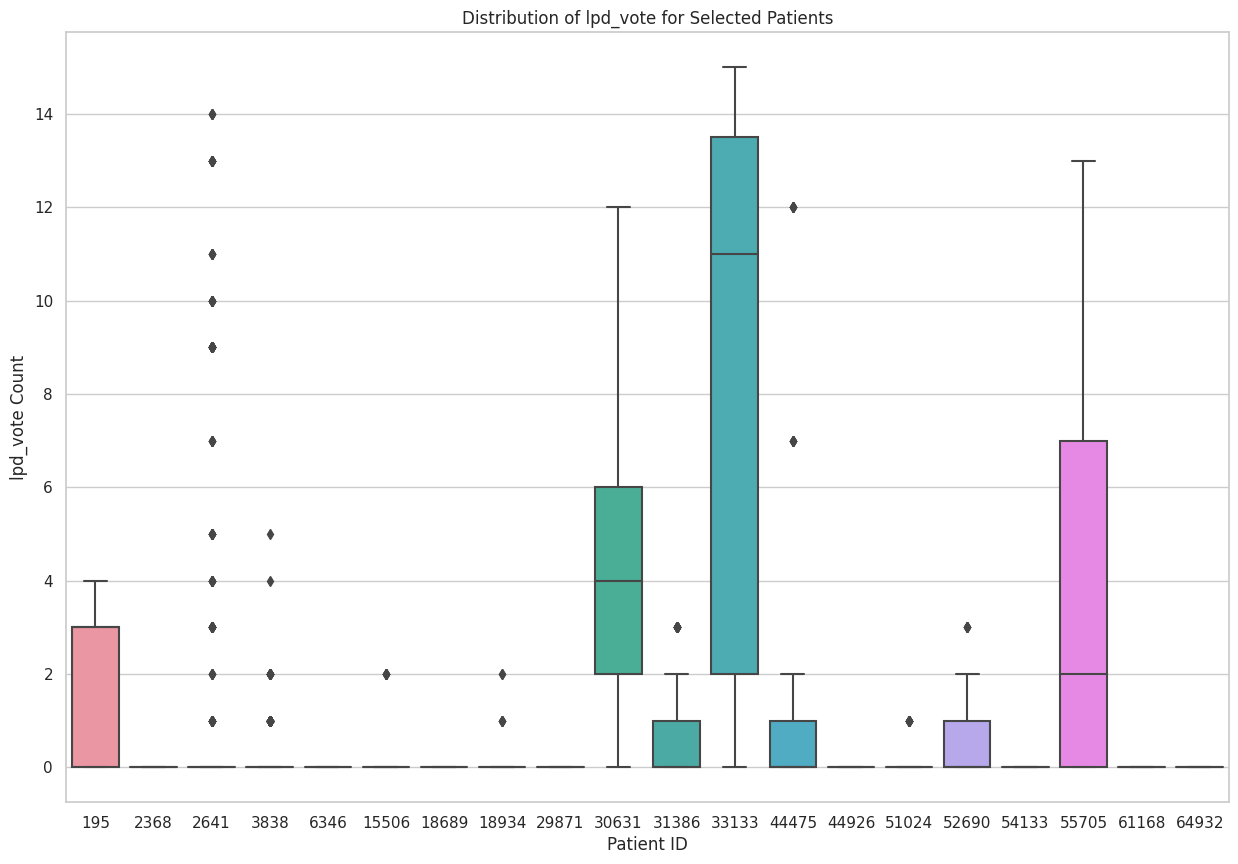

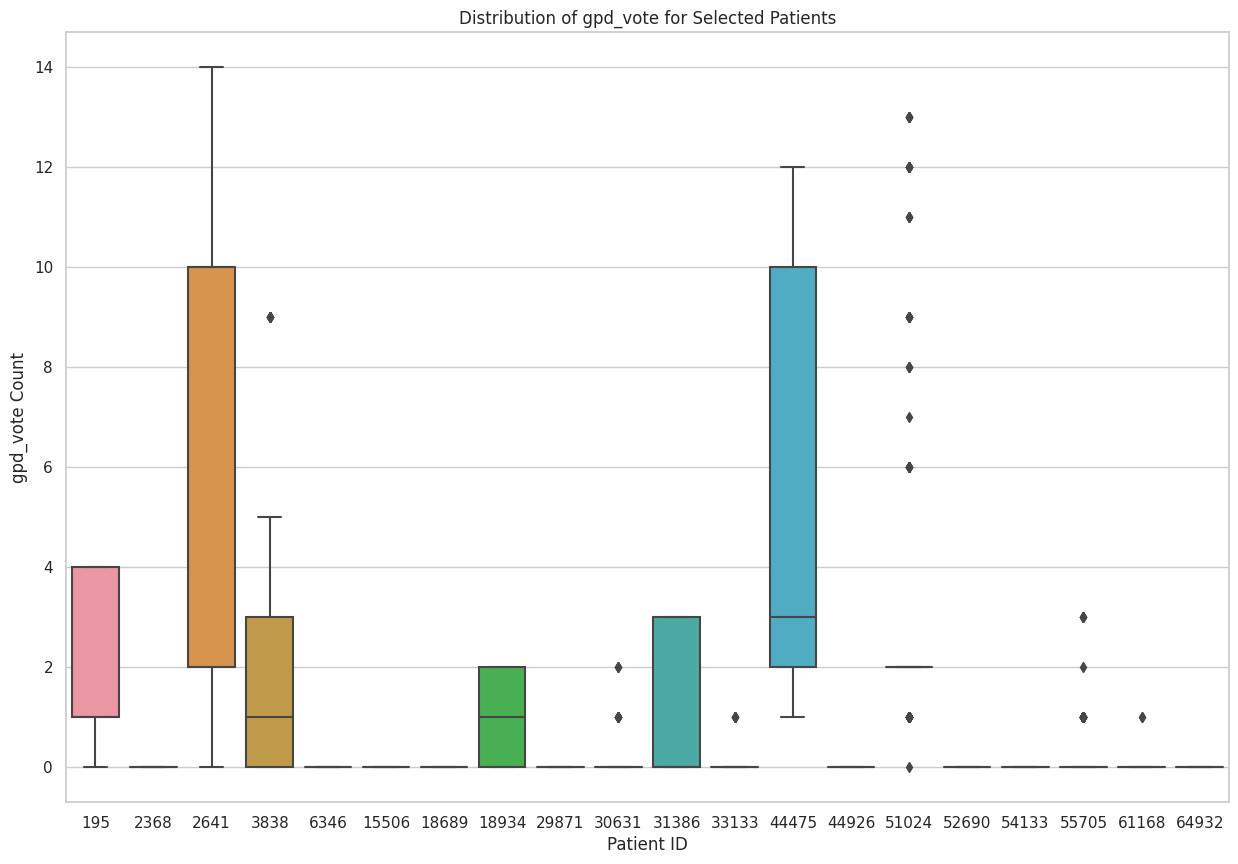

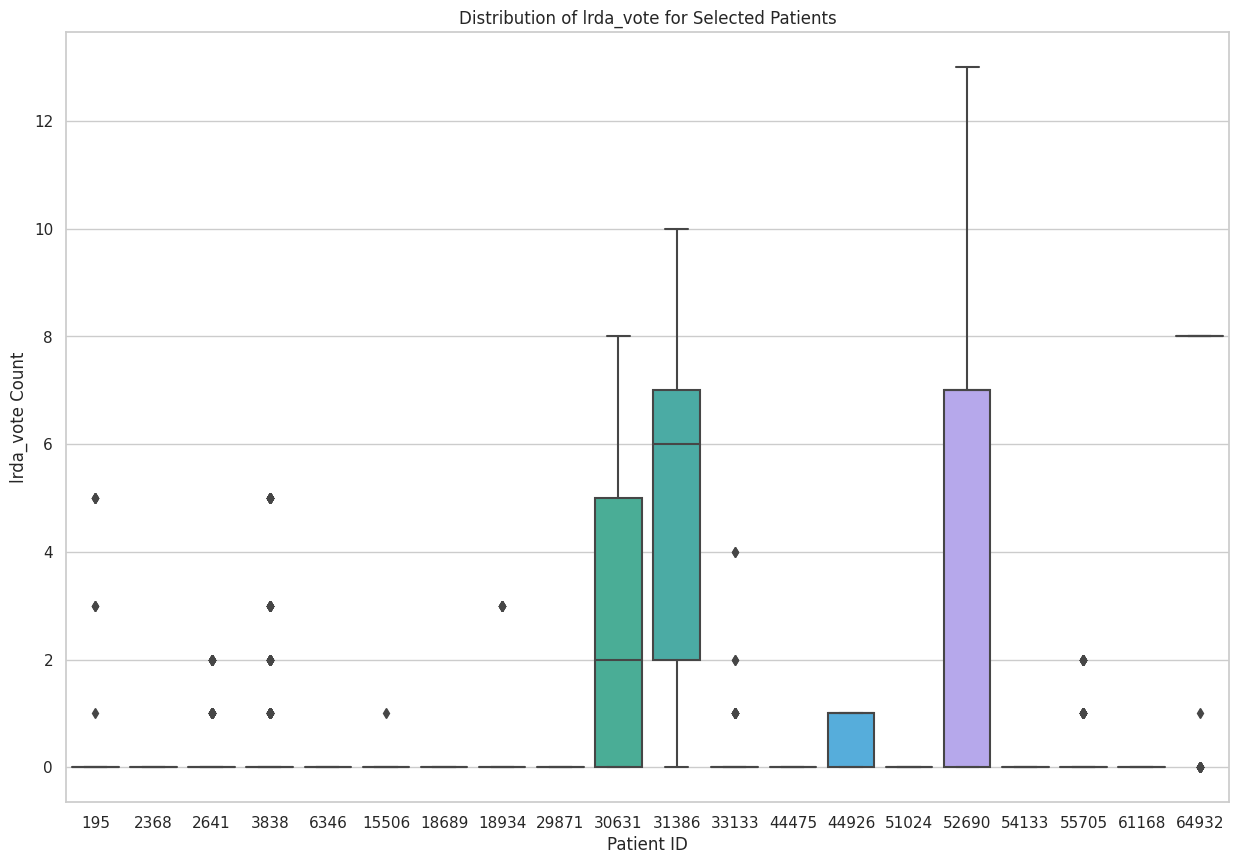

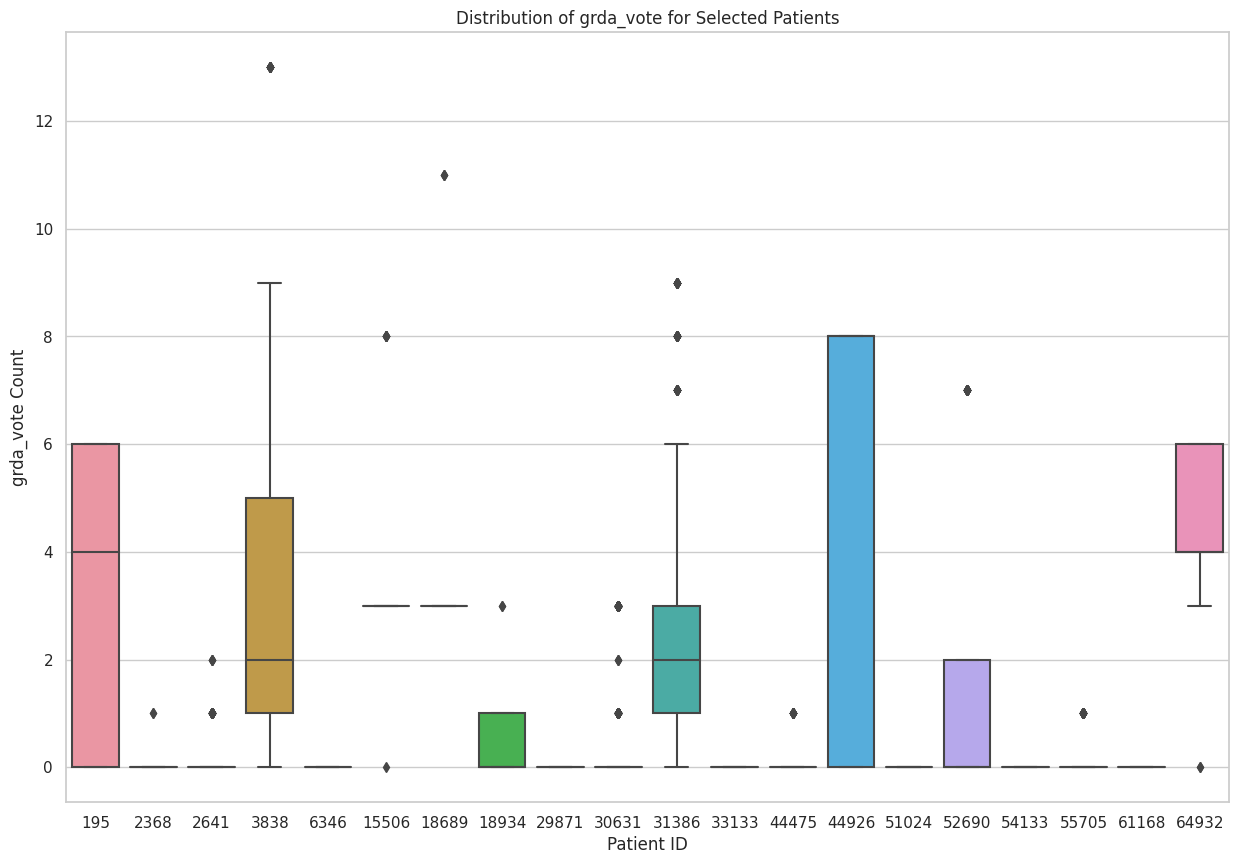

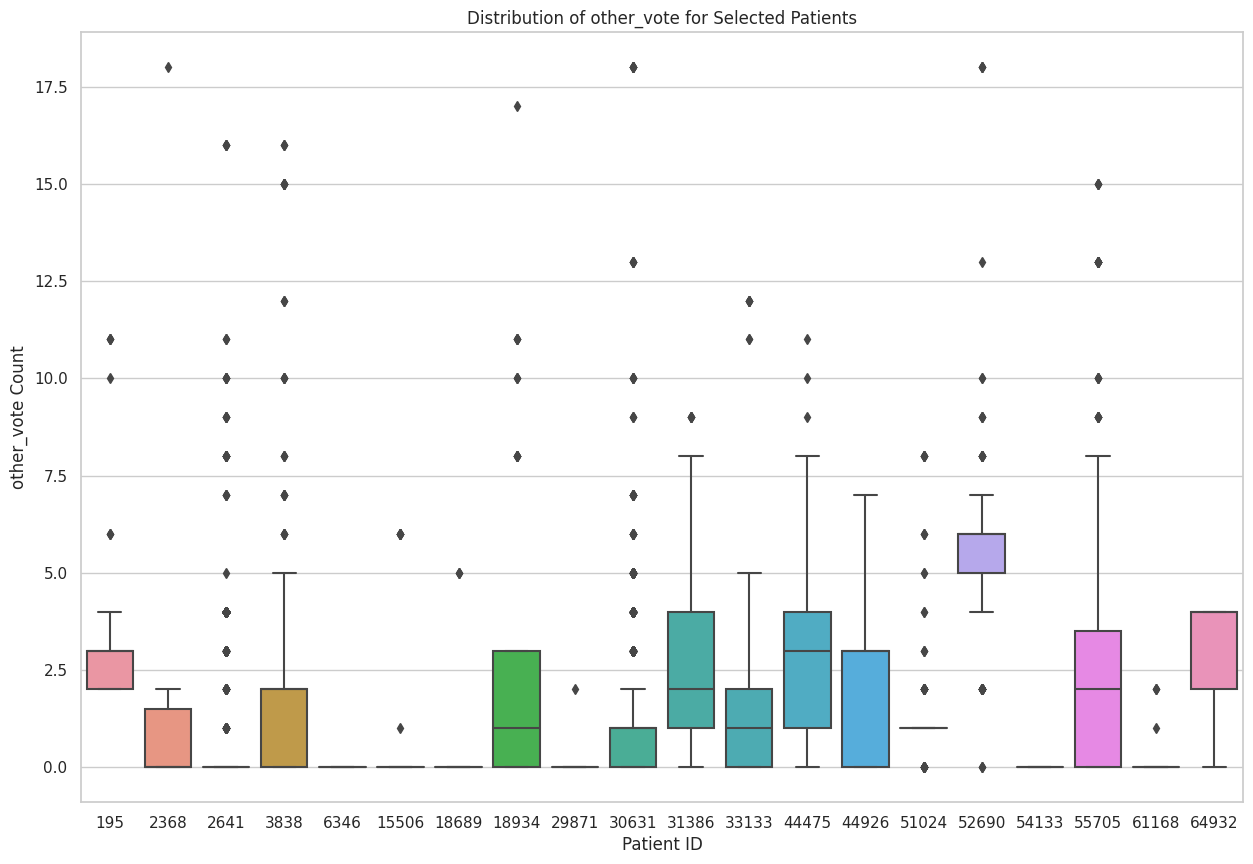

In [23]:
sample_patients = train['patient_id'].sample(20, random_state=1).values
sample_data = train[train['patient_id'].isin(sample_patients)]

for i, vote_type in enumerate(targets, 1):
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='patient_id', y=vote_type, data=sample_data)
    plt.title(f'Distribution of {vote_type} for Selected Patients')
    plt.xlabel('Patient ID')
    plt.ylabel(f'{vote_type} Count')
    plt.show()

<Figure size 1500x1000 with 0 Axes>

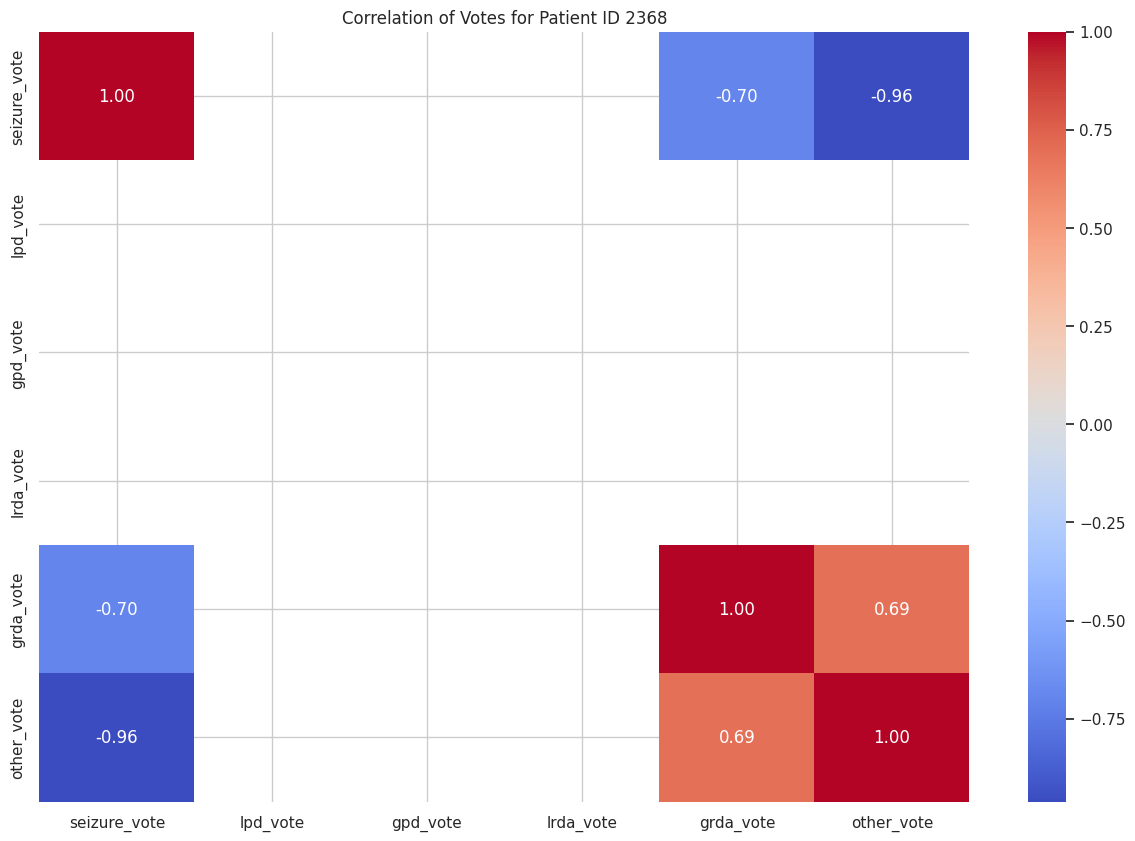

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


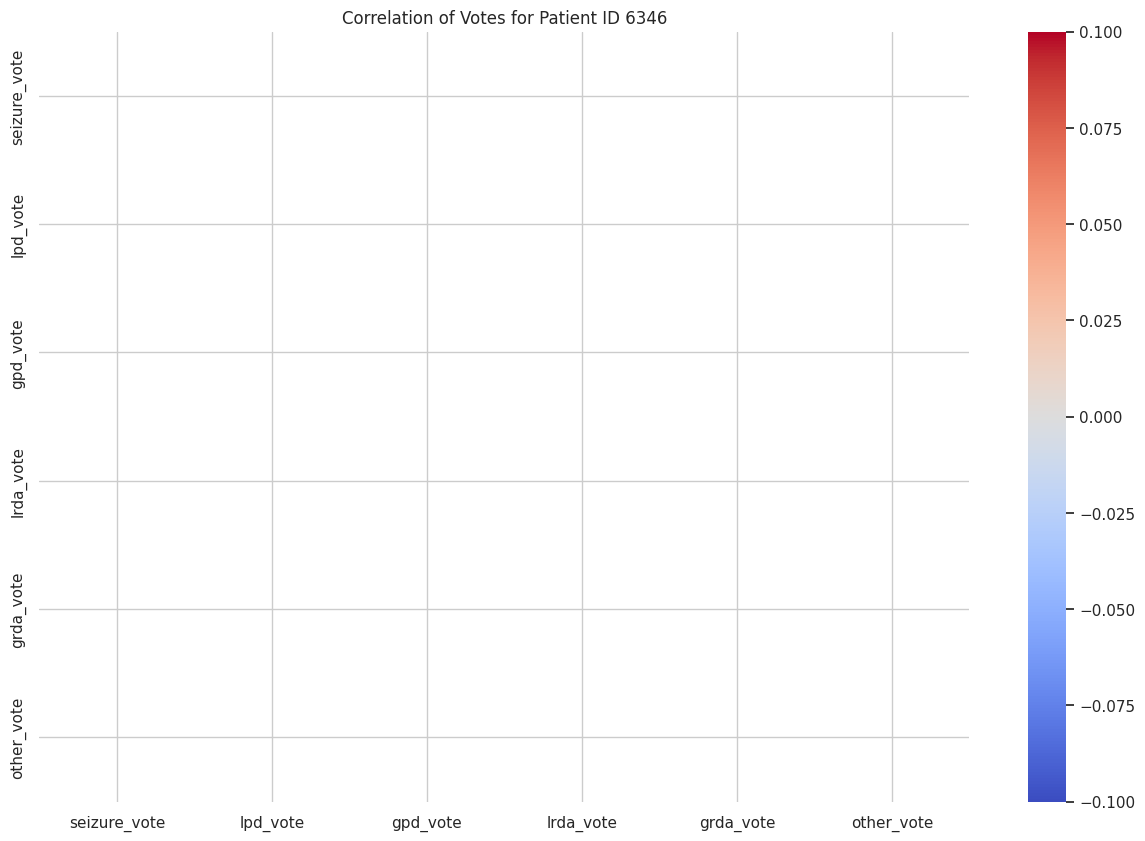

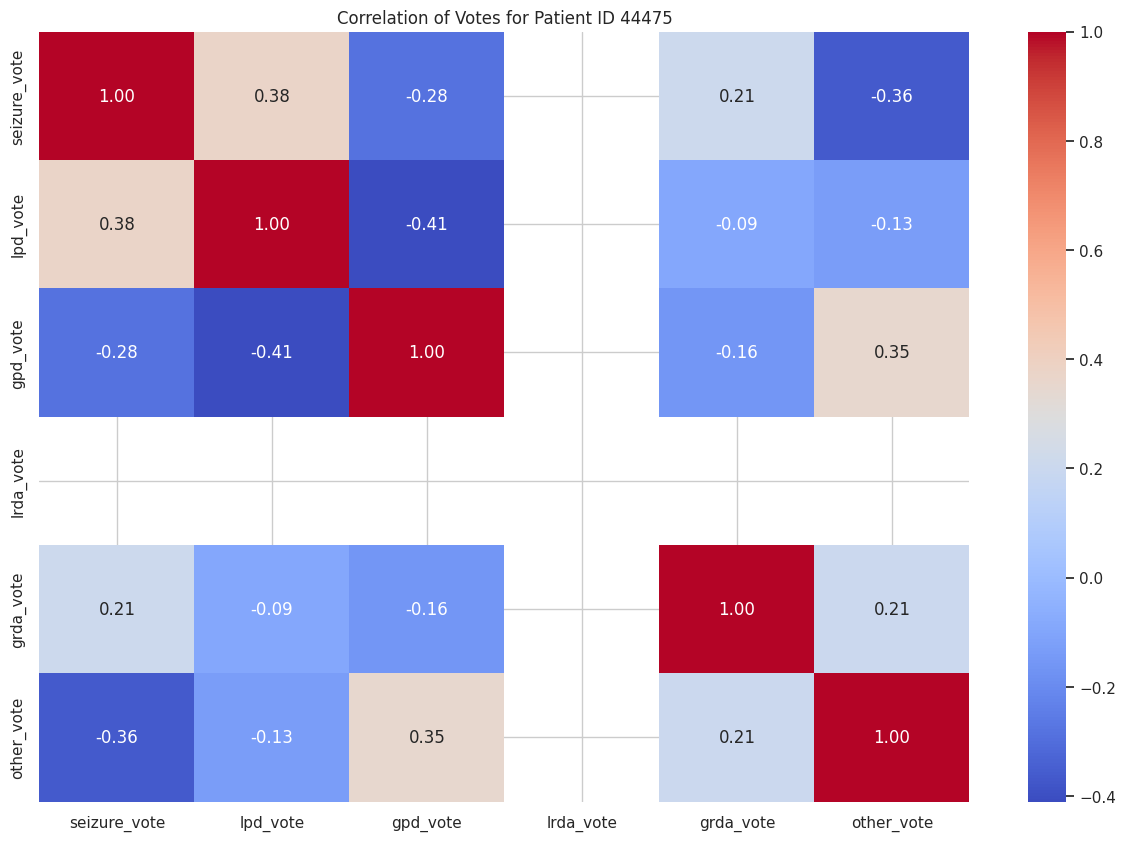

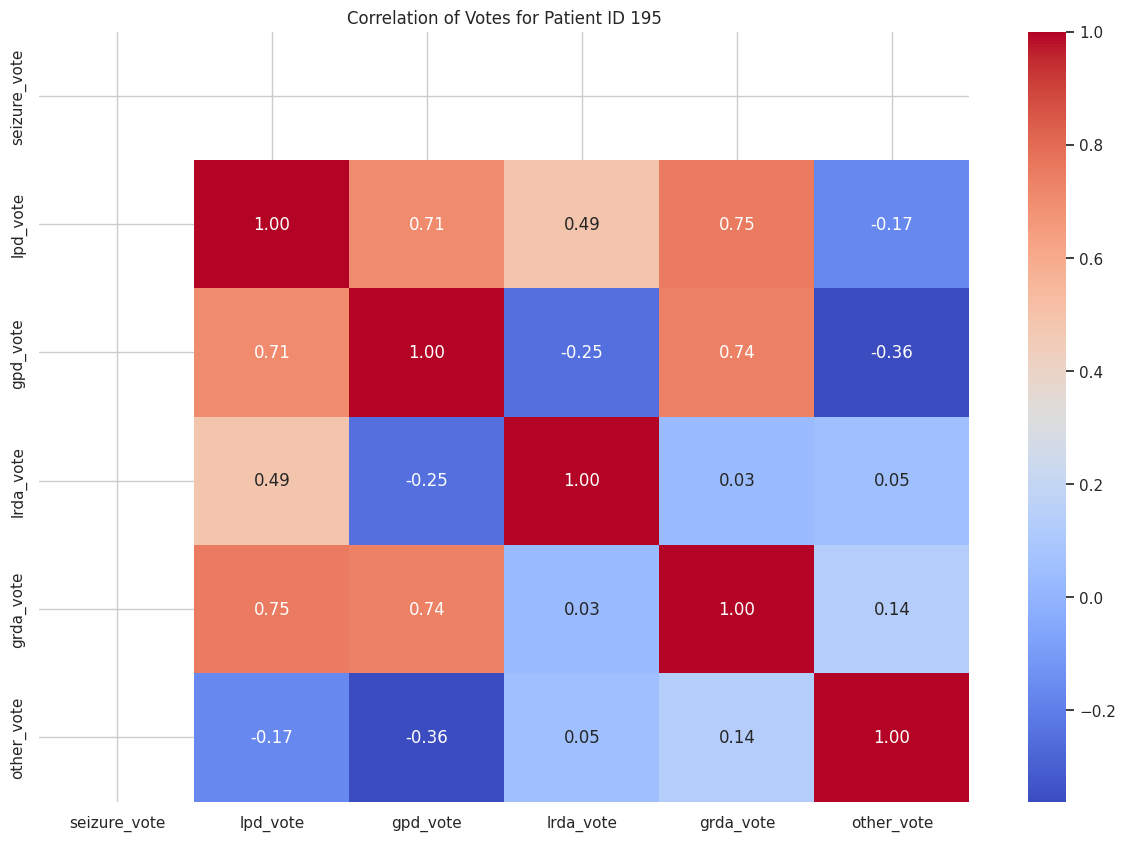

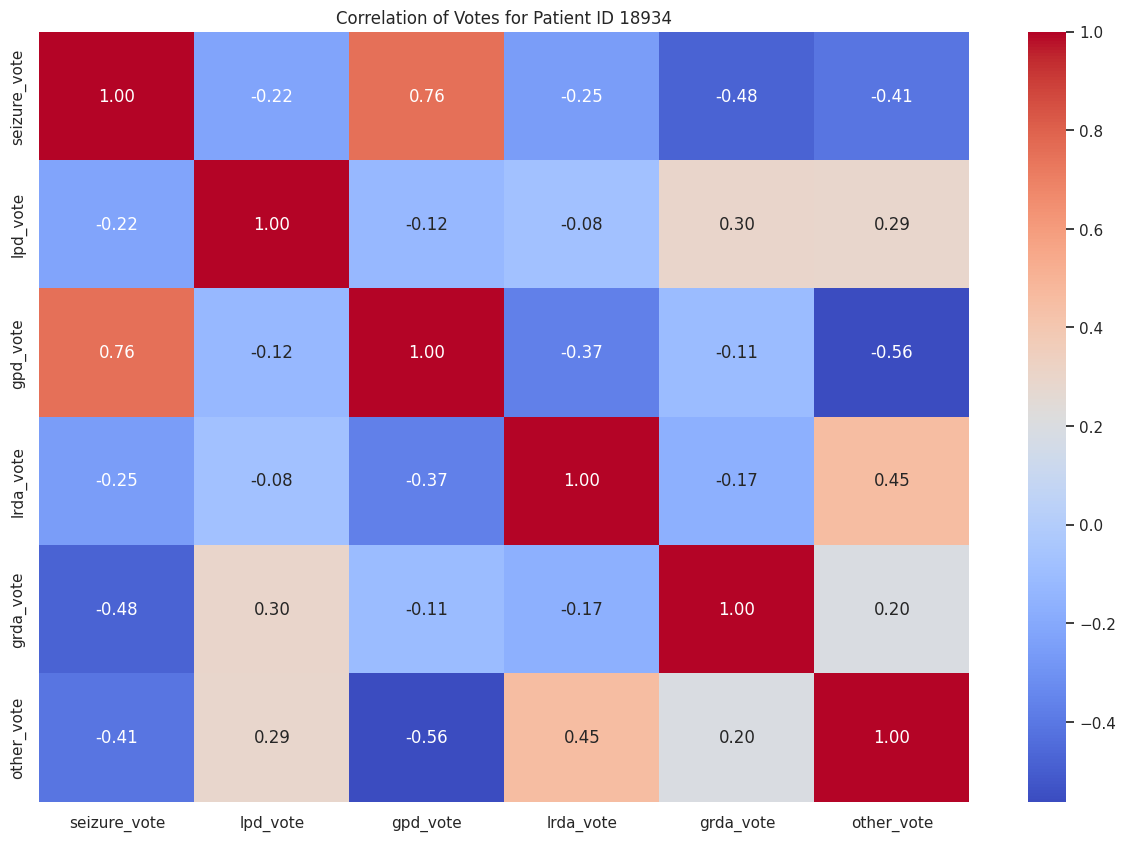

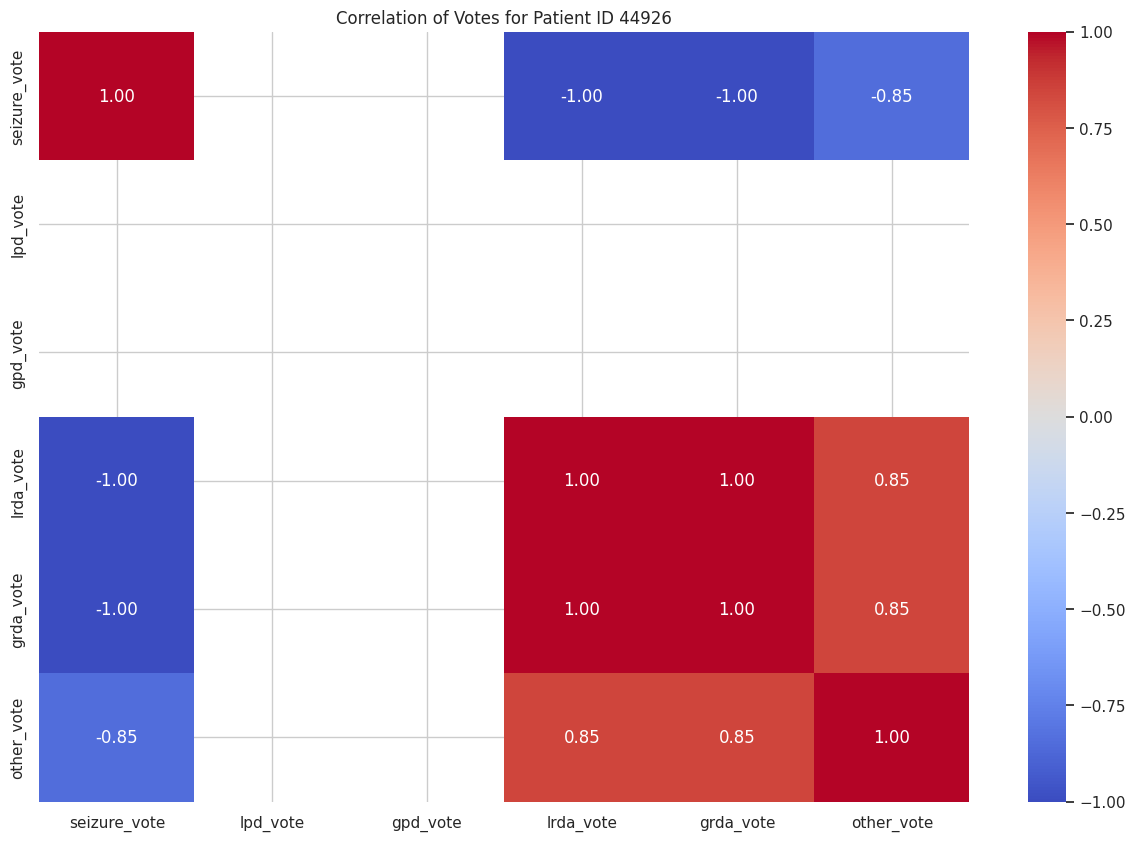

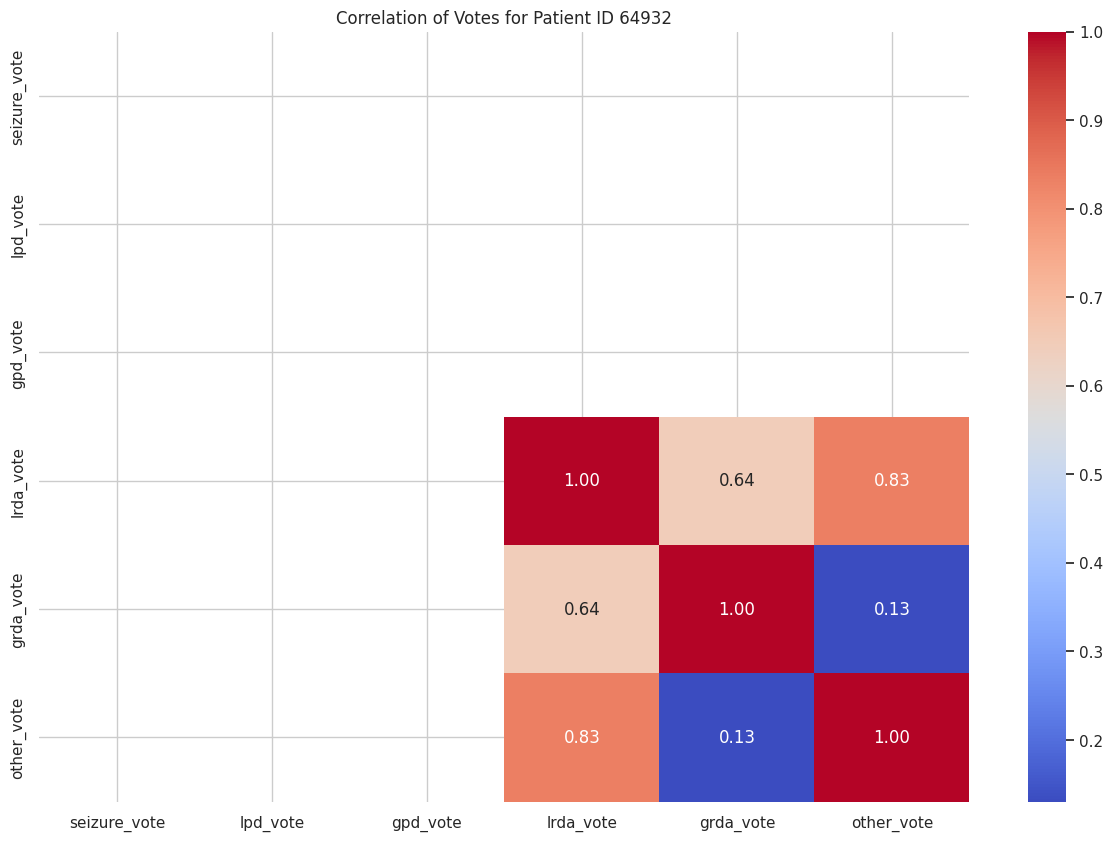

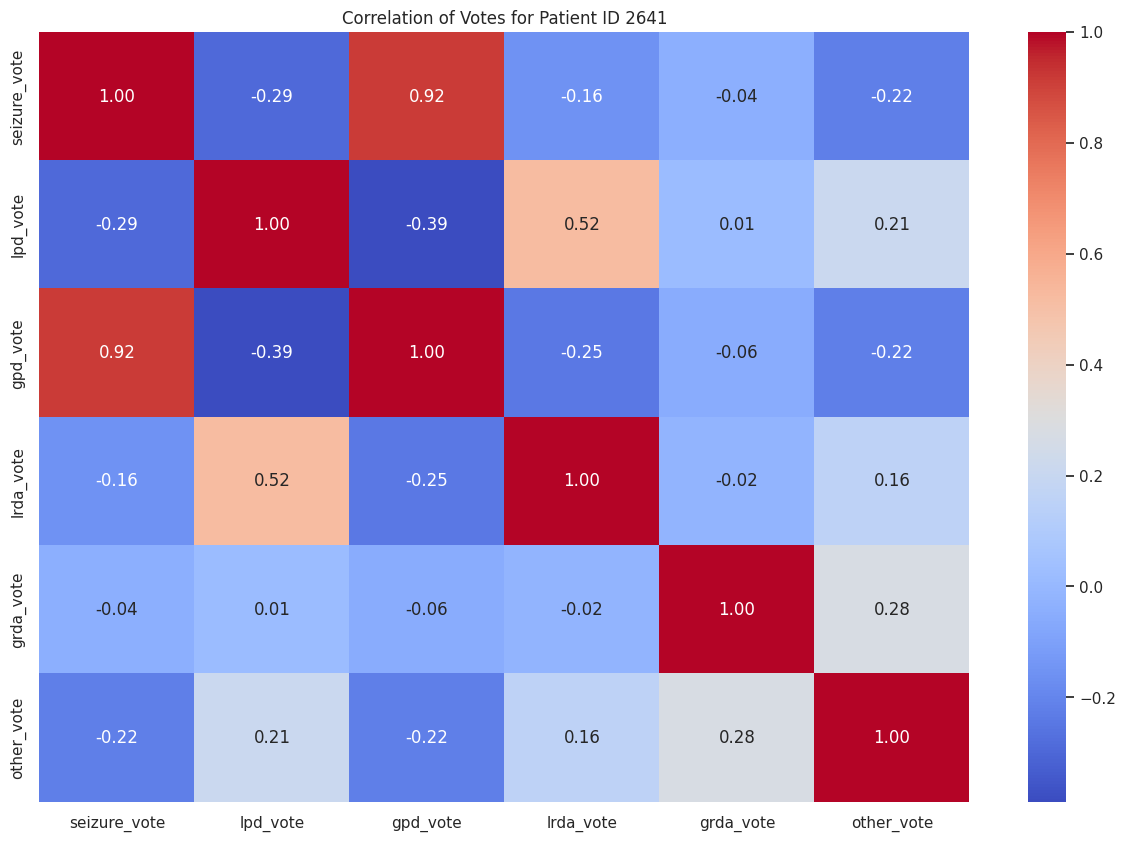

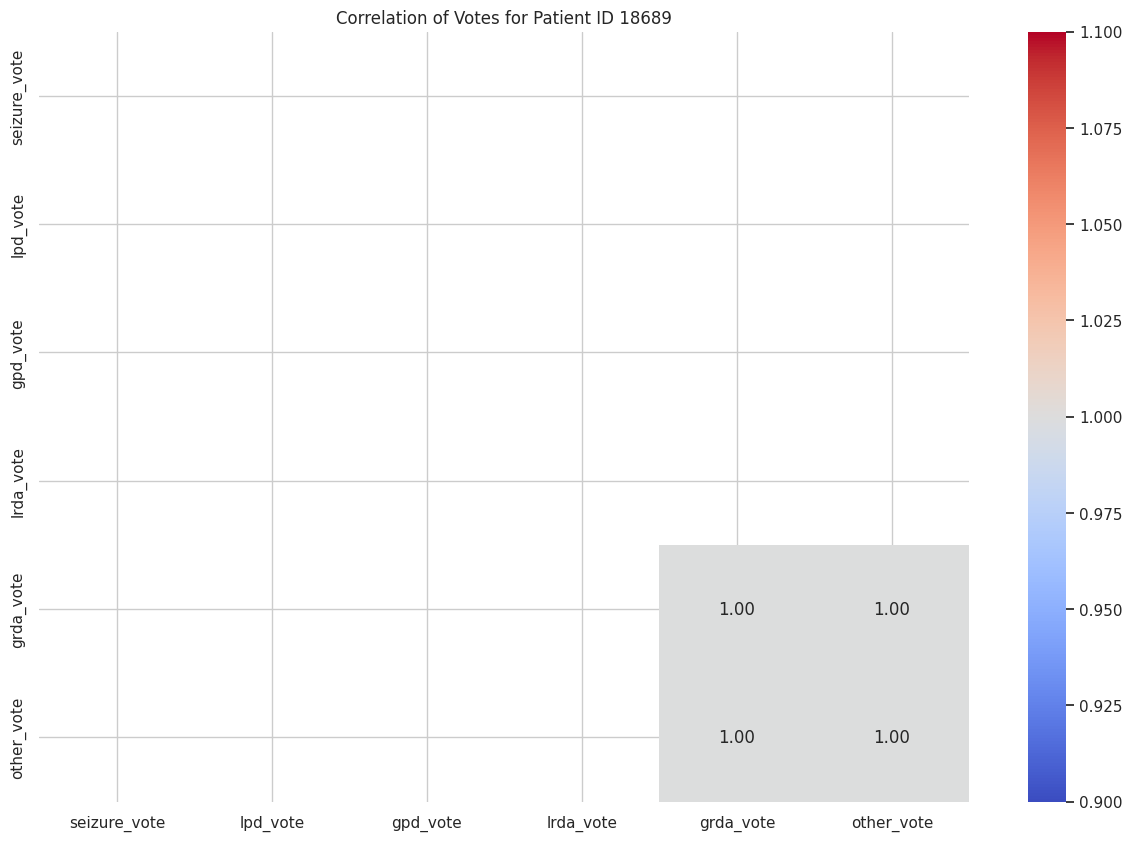

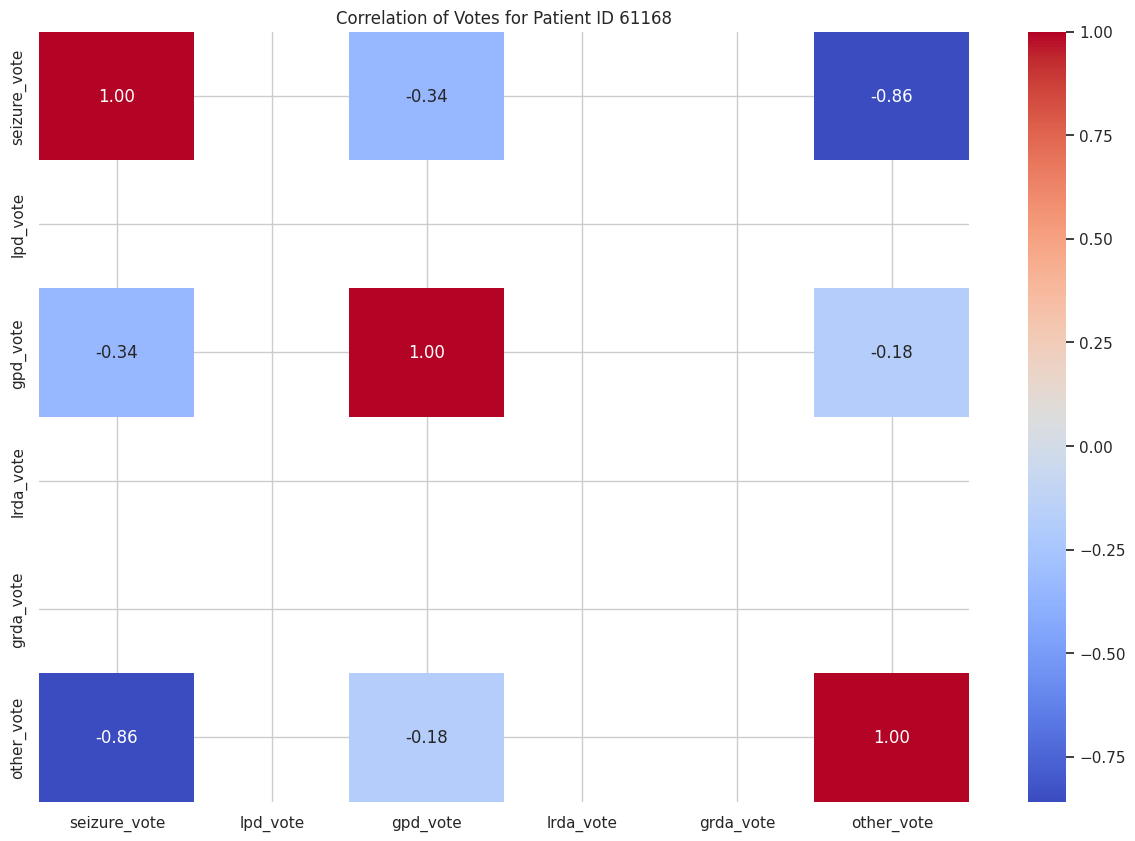

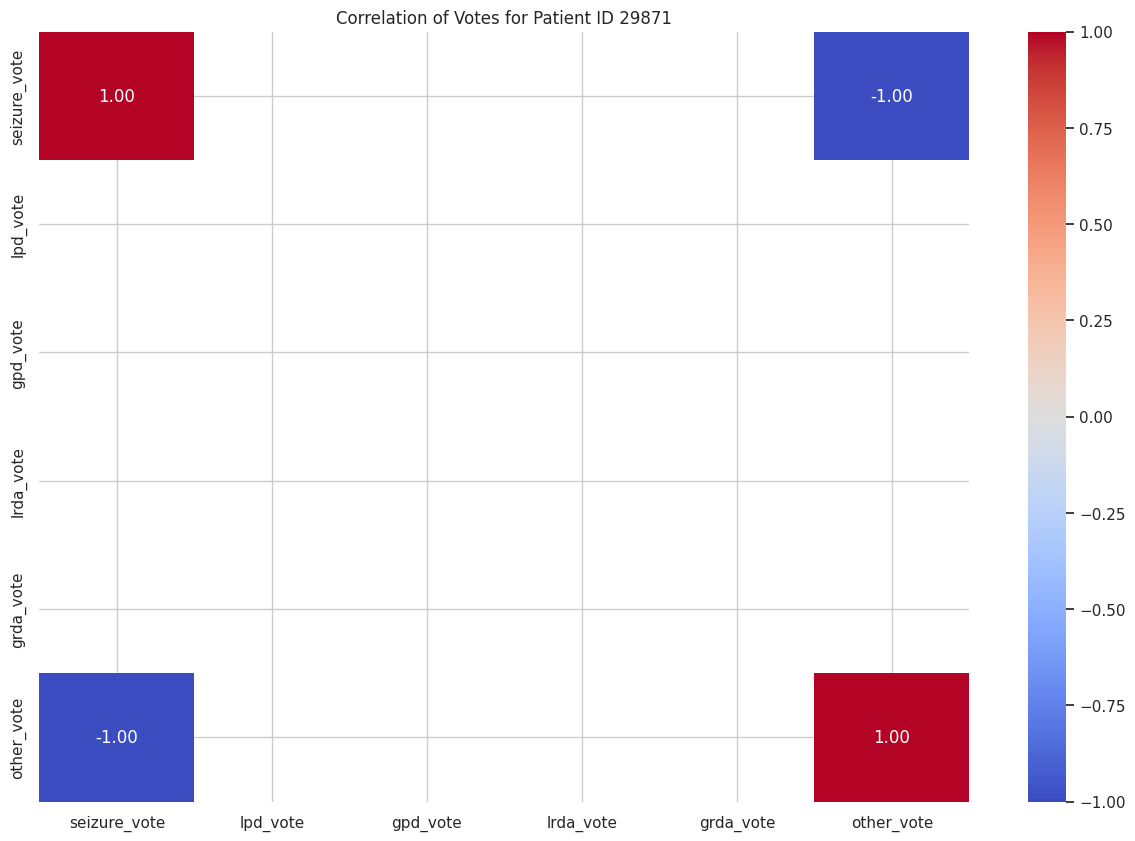

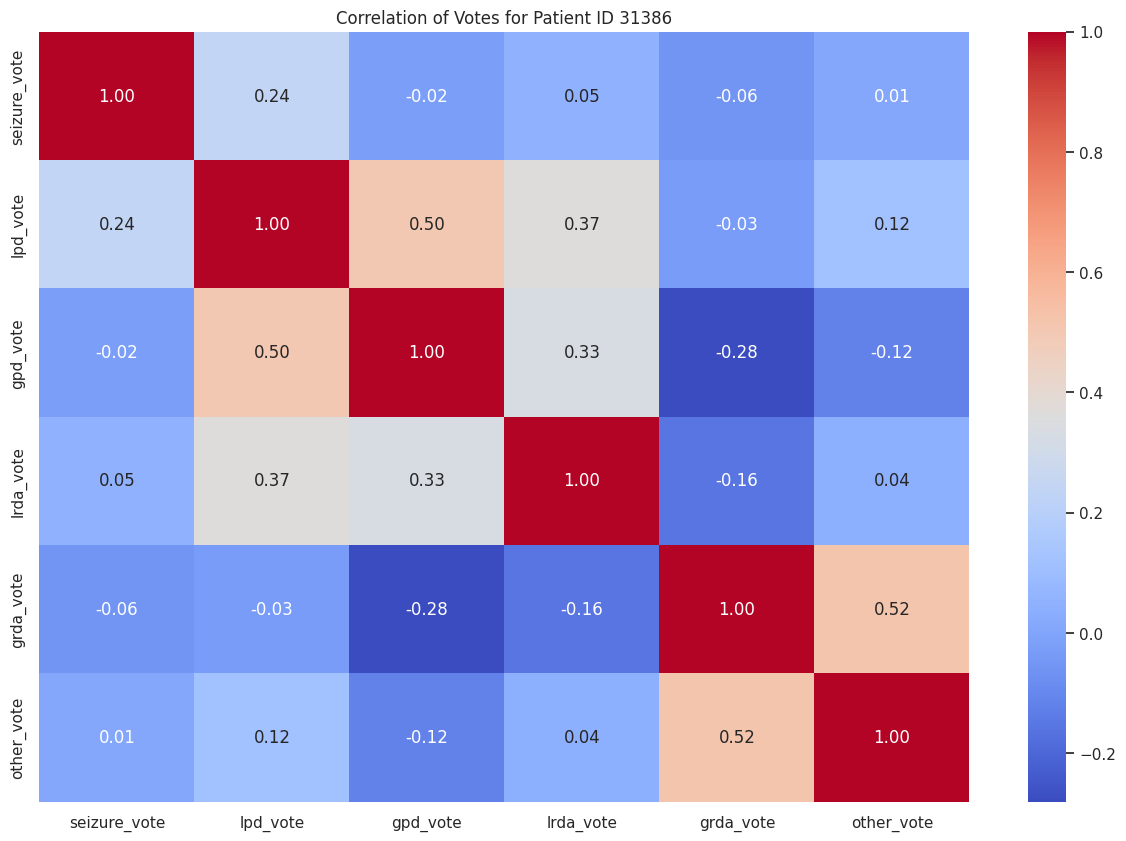

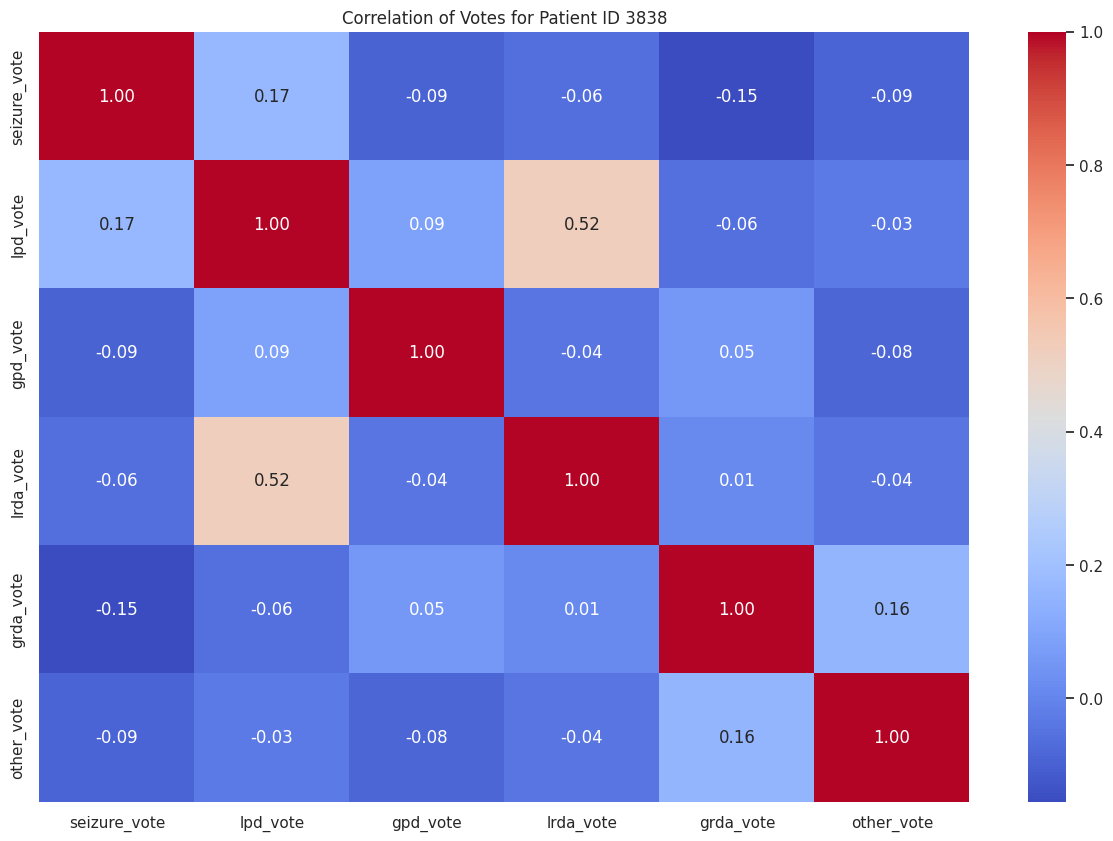

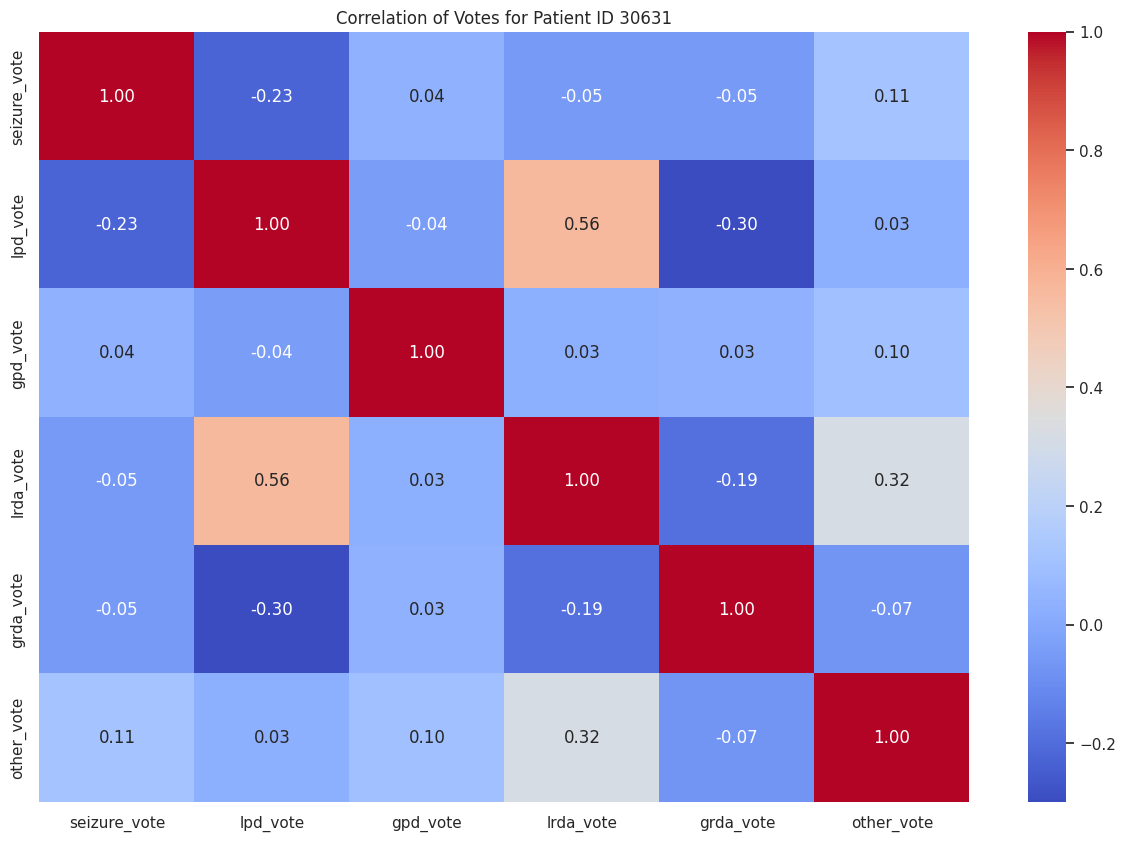

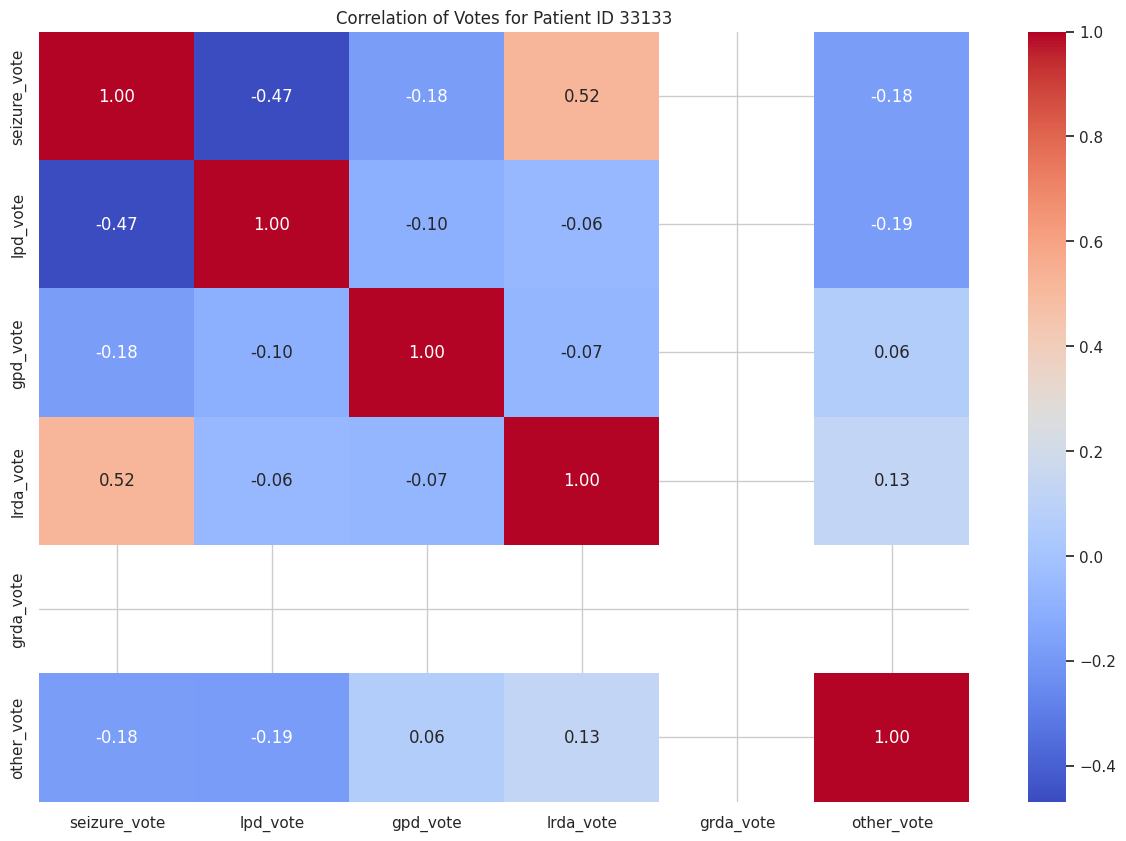

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


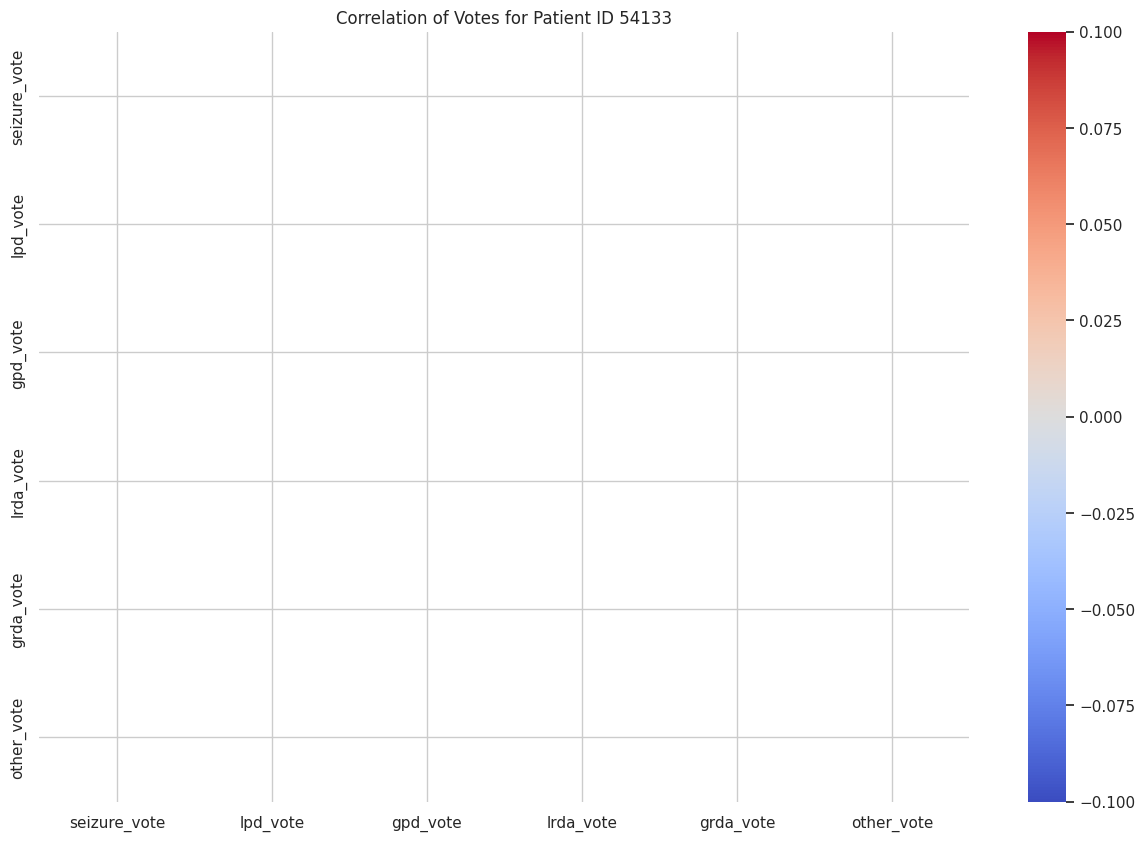

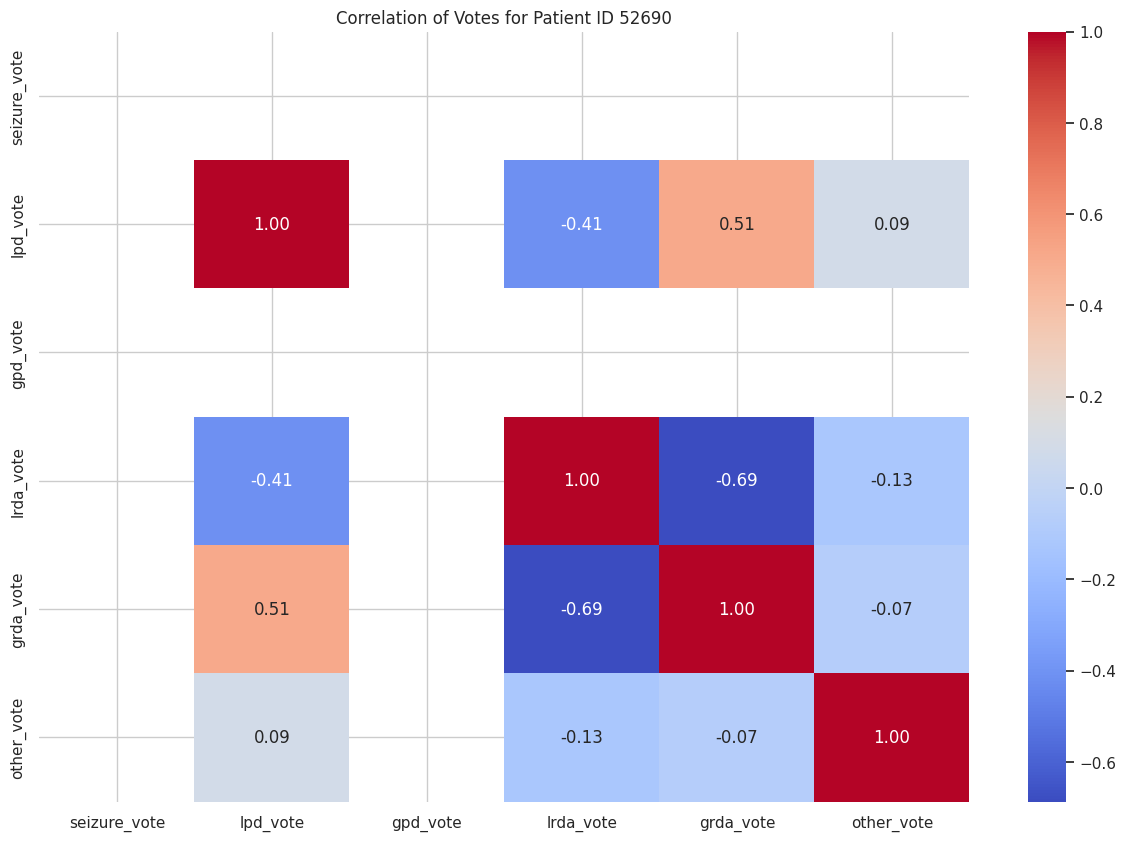

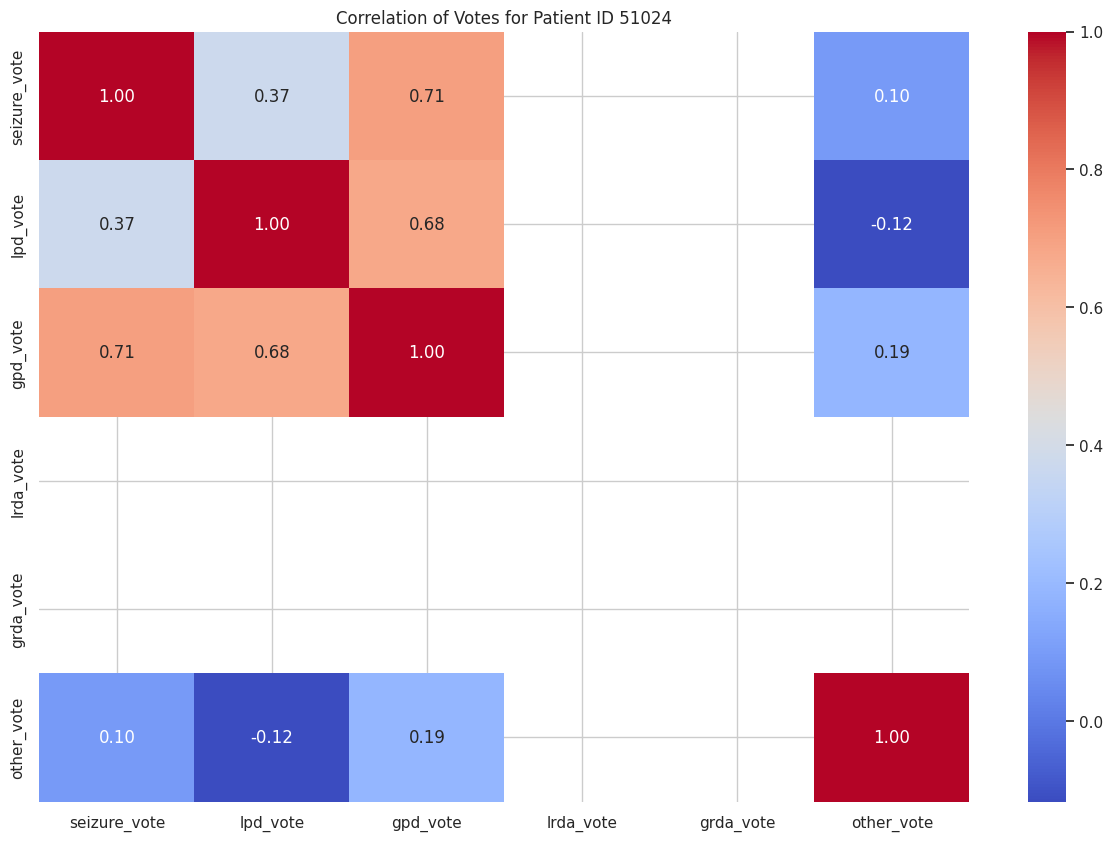

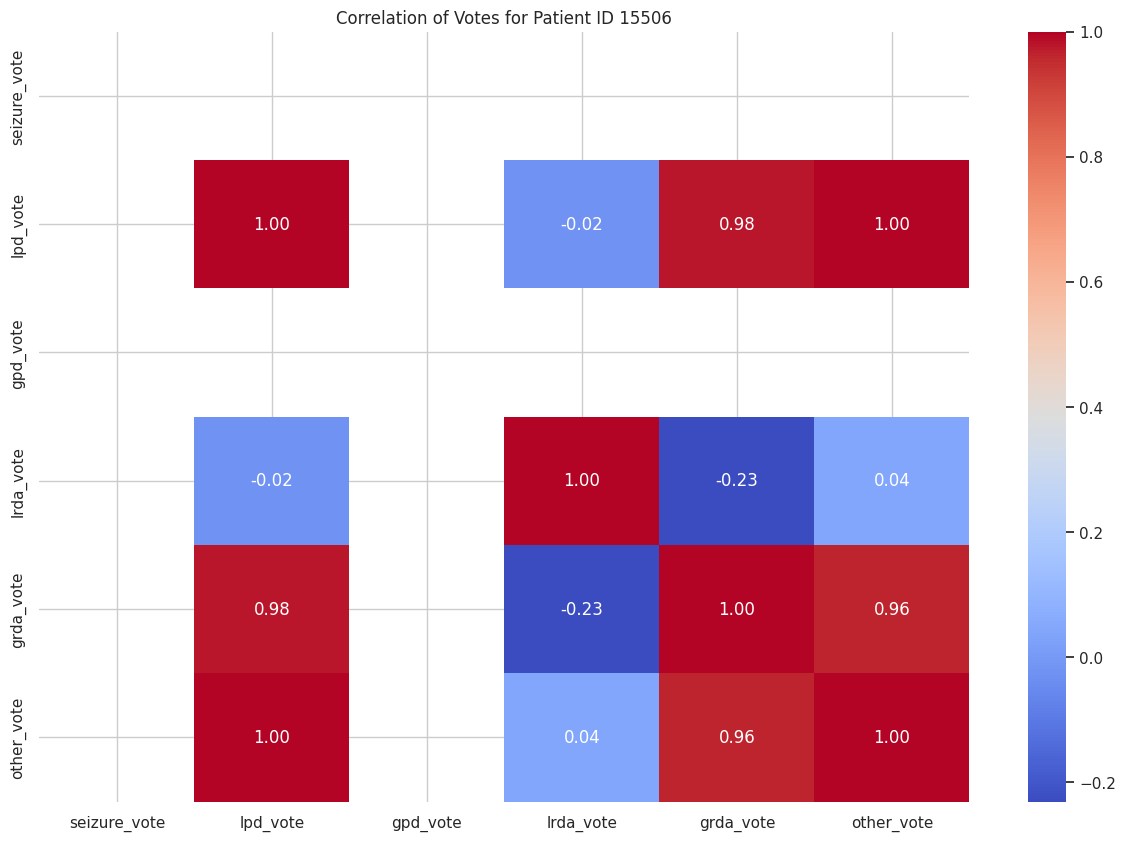

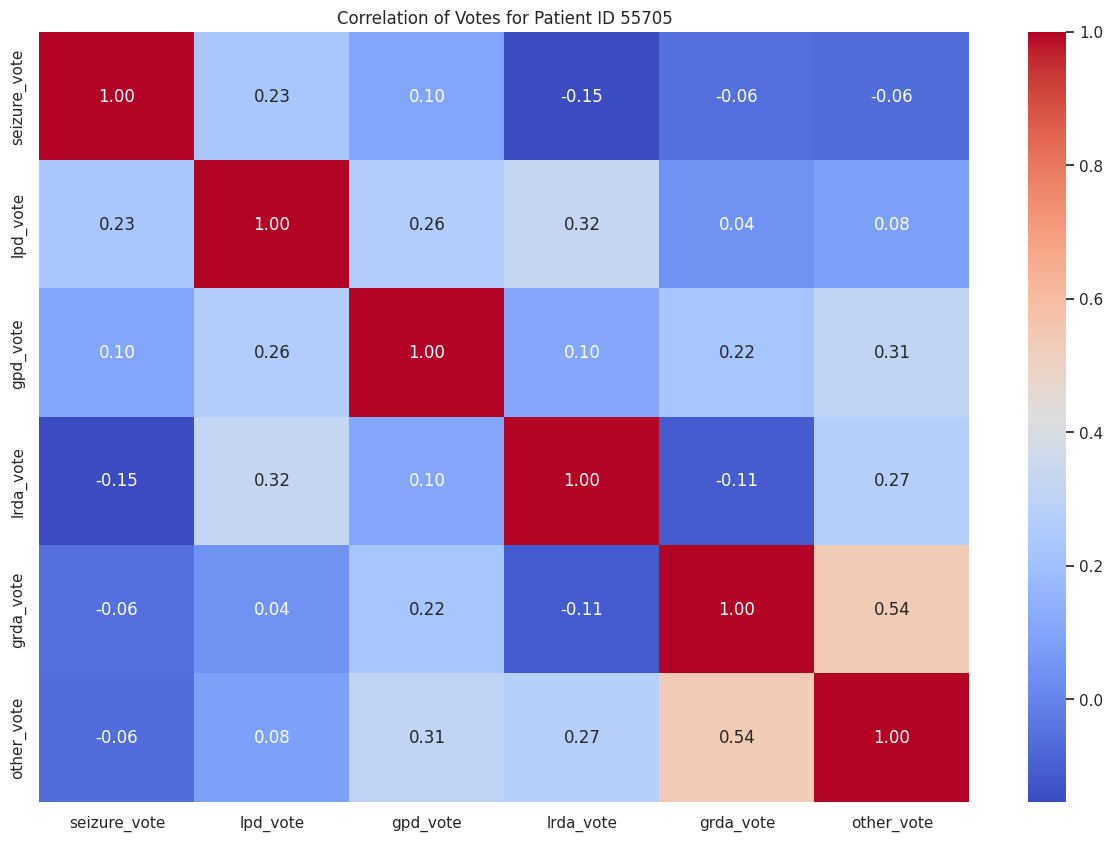

In [24]:
plt.figure(figsize=(15, 10))


for i, patient_id in enumerate(sample_patients, 1):
    plt.figure(figsize=(15, 10))
    patient_data = train[train['patient_id'] == patient_id]
    correlation_matrix = patient_data[targets].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation of Votes for Patient ID {patient_id}')
    plt.show()

In [25]:
total_votes_per_pat = train.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = train.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print( mean_vote_ratio )

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


## **Its @cdeotte idea** - https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/467021

In [26]:
gap = 1 - sum([round(v,6) for _, v in mean_vote_ratio.items()])
print(gap)
mean_vote_ratio['other_vote'] += gap

0.0


In [27]:
sum([round(v,5) for _, v in mean_vote_ratio.items()])

1.0000099999999998

In [28]:
mean_vote_ratio

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64

In [29]:
sub = pd.read_csv("/kaggle/input/hms-harmful-brain-activity-classification/sample_submission.csv")
for target in targets:
    sub[target] = mean_vote_ratio[target]
sub

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.310718,0.046279,0.051885,0.081796,0.231471,0.277851


In [30]:
sub.to_csv("/kaggle/working/submission.csv", index=False)